# Used mainly for plotting

Contains TPC structure

Some E field simulation

In [1]:
import straxen
import matplotlib.pyplot as plt
import numpy as np

2025-01-10 14:09:21,128 - admix - WARNING - Initializing utilix DB failed. You cannot do database operations


DB initialization failed


In [2]:
import sys, os
sys.path.append(os.path.join(os.getcwd(), 'ActualThesisWork'))
%load_ext autoreload
%autoreload 2
from functions import *

2025-01-10 14:09:23.222217: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-10 14:09:23.245210: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-10 14:09:23.354190: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-10 14:09:23.354277: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-10 14:09:23.369966: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [3]:
pmt_pos = straxen.pmt_positions()
pmt_pos_top = pmt_pos[pmt_pos.array == "top"].to_numpy()
n_pmts = pmt_pos_top.shape[0]

dead_pmts = np.array([ 28, 108, 121, 144, 156, 164, 177])
pmt_radius = straxen.tpc_pmt_radius# 3  * 2.54 / 2 
tpc_radius = 66.4 # pm 0.2
max_z = straxen.tpc_z

# https://xe1t-wiki.lngs.infn.it/doku.php?id=xenon:xenonnt:dsg:tpc:fibers:position&s[]=xenonnt&s[]=fibers&s[]=position 
# Above prob not exactly the same but good enough
# Also rotation found by trial and error -> See next cell for full coordinates
fibers = np.array([
    [577.64, 333.5],
    [333.5, 577.64],
    [-333.5, 577.64],
    [333.5, -577.64],
    [-333.5, -577.64],
    [-577.64, 333.5],
    [577.64, -333.5],
    [-577.64, -333.5],
]) / 10 # to cm
# We also need to rotate
angle_radians = np.radians(-15)  # Convert to radians
rotation_matrix = np.array([
    [np.cos(angle_radians), -np.sin(angle_radians)],
    [np.sin(angle_radians), np.cos(angle_radians)]
])
fibers = fibers @ rotation_matrix

In [4]:
# Initial position
initial_position = np.array([577.64, 333.5]) / 10

# Number of divisions and rotation angle in radians
n_divisions = 12
angle = 2 * np.pi / n_divisions

# Calculate all positions
positions = [initial_position]  # Start with the initial position
for i in range(1, n_divisions):
    rotation_matrix = np.array([[np.cos(i * angle), -np.sin(i * angle)],
                                [np.sin(i * angle), np.cos(i * angle)]])
    new_position = rotation_matrix @ initial_position
    positions.append(new_position)

# Convert positions to a more readable format and print
positions = np.array(positions)

angle_radians = np.radians(-15)  # Convert to radians
rotation_matrix = np.array([
    [np.cos(angle_radians), -np.sin(angle_radians)],
    [np.sin(angle_radians), np.cos(angle_radians)]
])
fibers = positions @ rotation_matrix

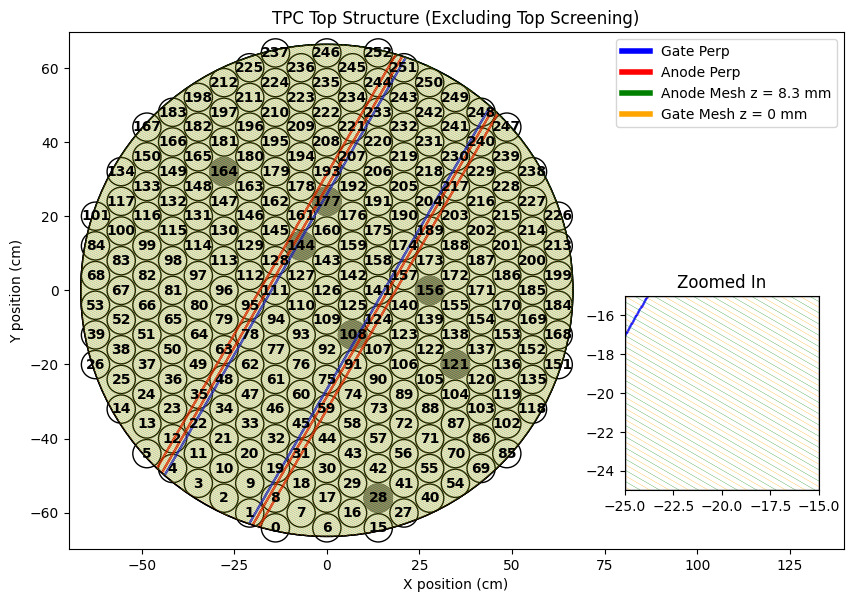

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from matplotlib.patches import Rectangle
# Your existing plot code
plt.figure(figsize=(10, 20))
plt.title("TPC Top Structure (Excluding Top Screening)")

# Main circle for TPC boundary
circle = plt.Circle((0, 0), radius=tpc_radius, color='black', fill=False)
plt.gca().add_artist(circle)

# Plot other elements
plot_pmt_indeces(pmt_pos_top, ax=plt.gca(), fontsize=10, dead_pmts=dead_pmts)
plot_anode_gate(tpc_radius, ax=plt.gca(), s=0.01, n=5000)

# Anode and Gate meshes
plot_mesh(tpc_radius, wire_pitch=5.0 / 10, num_wires=265, rotation_angle=np.pi / 3, ax=plt.gca(), offset=0.25, linewidth=0.2, color='green')
plot_mesh(tpc_radius, wire_pitch=5.0 / 10, num_wires=266, rotation_angle=np.pi / 3, ax=plt.gca(), linewidth=0.2, color='orange')

# Scatter plot for fibers
#plt.scatter(fibers[:, 0], fibers[:, 1], marker='x', color='purple', s=100, linewidth=5)

# Set limits and aspect ratio
plt.xlim(-tpc_radius * 1.05, tpc_radius * 1.05 * 2)
plt.ylim(-tpc_radius * 1.05, tpc_radius * 1.05)
plt.gca().set_aspect('equal', adjustable='box')

# Create custom legend
legend_entries = [
    Line2D([0], [0], color='blue', lw=4, label='Gate Perp'),
    Line2D([0], [0], color='red', lw=4, label='Anode Perp'),
    Line2D([0], [0], color='green', lw=4, label='Anode Mesh z = 8.3 mm'),
    Line2D([0], [0], color='orange', lw=4, label='Gate Mesh z = 0 mm'),
    #Line2D([0], [0], color='purple', lw=4, label='Fibers z = (-20, -25) cm'),
]
plt.legend(handles=legend_entries, loc='upper right')

# Create an inset axes for zooming in
axins = inset_axes(plt.gca(), width="40%", height="40%", loc='lower right', bbox_to_anchor=(0.1, 0.1, 0.94, 0.94), bbox_transform=plt.gca().transAxes)  # Adjust size and position
zoom_x_range = (-25, -15)  # Set x limits for the zoomed area
zoom_y_range = (-25, -15)   # Set y limits for the zoomed area
plot_anode_gate(tpc_radius, ax=axins, s=0.2, n=5000)
plot_mesh(tpc_radius, wire_pitch=5.0 / 10, num_wires=265, rotation_angle=np.pi / 3, ax=axins, offset=0.25, linewidth=0.2, color='green')
plot_mesh(tpc_radius, wire_pitch=5.0 / 10, num_wires=266, rotation_angle=np.pi / 3, ax=axins, linewidth=0.2, color='orange')
#axins.scatter(fibers[:, 0], fibers[:, 1], marker='x', color='purple', s=100, linewidth=5)
axins.set_title("Zoomed In")
# Set the zoom limits
axins.set_xlim(zoom_x_range)
axins.set_ylim(zoom_y_range)
axins.set_aspect('equal', adjustable='box')

rect_x = zoom_x_range[0]
rect_y = zoom_y_range[0]
rect_width = zoom_x_range[1] - zoom_x_range[0]
rect_height = zoom_y_range[1] - zoom_y_range[0]

# Optionally add a rectangle to indicate the area being zoomed in
mark_inset(plt.gca(), axins, loc1=2, loc2=4, fc="none", ec="black")

# Show the plot
plt.show()


/tmp/ipykernel_817/1941877051.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))  # Position legend to the right


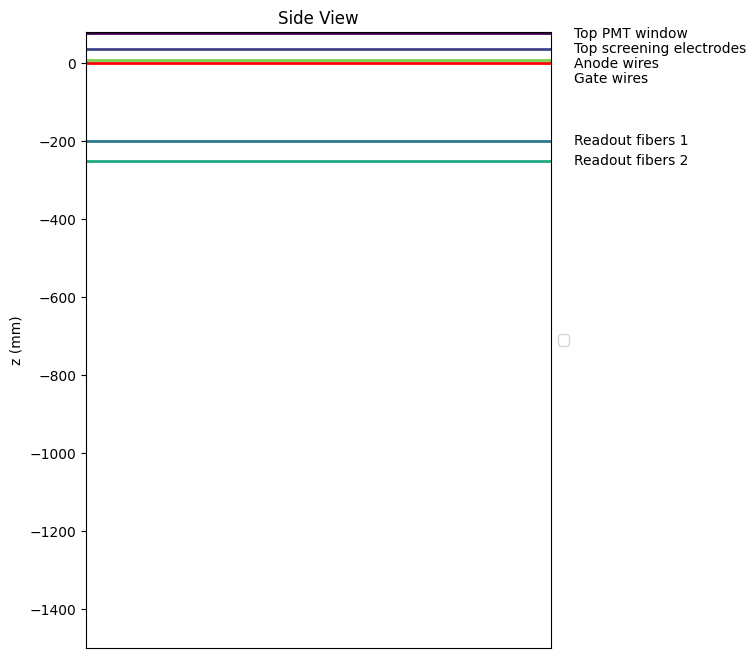

In [26]:
# Feature z-coordinates in mm
features = {
    "Top PMT window": 76.94,
    "Top screening electrodes": 36.18,
    #"Anode wires": 8.3,
    "Readout fibers 1": -200,
    "Readout fibers 2": -250
}

# Create the plot
fig, ax = plt.subplots(figsize=(6, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(features)+2))
# Plot each feature as a horizontal line at the specified z-coordinate
for (label, z), color in zip(features.items(), colors):
    ax.plot([-1, 1], [z, z], color=color, lw=2)   # Use x-range (-1, 1) to display lines centrally
    ax.text(1.1, z, label, va='center')  # Use x-range (-1, 1) to display lines centrally

# Anode wire text was colliding
ax.plot([-1, 1], [8.3, 8.3], color=colors[-2], lw=2)   
ax.text(1.1, 0, "Anode wires", va='center')
ax.plot([-1, 1], [0, 0], color='red', lw=2)   
ax.text(1.1, -40, "Gate wires", va='center')

# Configure y-axis
ax.set_ylim(-1500.8, 80)  # Slightly extend beyond the min/max to see all features
ax.set_ylabel("z (mm)")
ax.set_title("Side View")
ax.set_xticks([])  # Remove x-axis ticks and labels
ax.set_xlim(-1,1)
# Show legend and plot
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))  # Position legend to the right
plt.show()

## Thesis Title Page

In [111]:
%pip install cairosvg

Note: you may need to restart the kernel to use updated packages.


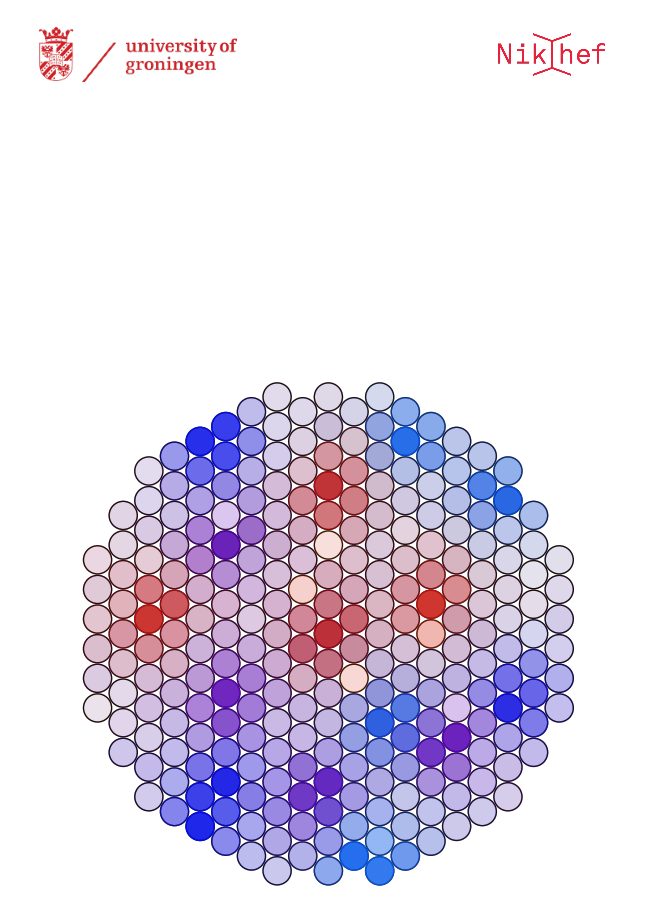

In [386]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
from PIL import Image
from io import BytesIO
import cairosvg
# A4 page
fig = plt.figure(figsize=(8.27, 11.69),facecolor='white')
aspect_ratio = 11.69 / 8.27

ax = fig.add_subplot(111)
ax.axis('off')

ax.set_aspect('equal')


# Nikhef logo
logo_path = '/Code/misc/Nikhef-logo-red-on-white-1.svg'
nikhef_logo = cairosvg.svg2png(url=logo_path)
nikhef_logo = Image.open(BytesIO(nikhef_logo))
imagebox = OffsetImage(nikhef_logo, zoom=0.2)
ab = AnnotationBbox(imagebox, (0.85, 0.95), frameon=False, xycoords='axes fraction')  # Center position
ax.add_artist(ab)


# RUG logo
eps_path = '/Code/misc/rugr_logoen_rood_rgb.svg'
rug_logo = cairosvg.svg2png(url=eps_path)
rug_logo = Image.open(BytesIO(rug_logo))
imagebox = OffsetImage(rug_logo, zoom=0.6)
ab = AnnotationBbox(imagebox, (0.2, 0.95), frameon=False, xycoords='axes fraction')  # Center position
ax.add_artist(ab)



# PMT Circles
for i in pmt_pos_top:
    circle = plt.Circle((i[-2], i[-1]), pmt_radius, color='#1c1800', fill=False)
    ax.add_artist(circle)

# Background #101112 - PMT circle 2c3e50
blues = [ "#007ea7", "#00aaff"]
reds = ["#d62828"]
purples = ["#8a2be2", ]
outline_color_light_gray = "#d6d6d6"
outline_color_dark_blue = "#2c3e50"
colors = np.array(blues + reds + purples)
np.random.shuffle(colors)

# Background White 
blues = ["#025ced", "#020eed"]
reds = ["#d11704"]            
purples = ["#5f04b8"]         
colors = np.array(blues + reds + purples)
np.random.shuffle(colors)


# PMT Response center
all_pmt_response = []
pmt_response = [0.0,1.0803768634796143,7.42648983001709,1.2544403076171875,5.312455177307129,7.034584999084473,1.0358505249023438,1.7967162132263184,2.854196548461914,1.035354733467102,3.6247198581695557,6.662735462188721,0.981148898601532,6.311551570892334,6.357546806335449,0.9932717680931091,3.9094741344451904,3.9013452529907227,4.222618103027344,7.493537902832031,5.83620548248291,5.714659690856934,0.0,1.184149980545044,2.0996413230895996,0.0,2.3655269145965576,5.326144695281982,0.0,4.405358791351318,9.28544807434082,4.670495510101318,1.0790804624557495,1.6792607307434082,7.988492965698242,7.424880027770996,9.308629035949707,6.365268707275391,5.181459426879883,2.8032267093658447,4.301552772521973,5.535678863525391,2.792193651199341,8.66368293762207,5.100231647491455,10.989471435546875,7.127130508422852,9.134203910827637,9.677468299865723,10.188011169433594,10.456669807434082,3.6404941082000732,3.733035087585449,5.664371490478516,3.2336418628692627,5.176874160766602,7.594132423400879,11.151387214660645,5.316926956176758,6.4144368171691895,14.570107460021973,11.069215774536133,7.02190637588501,3.8788363933563232,12.535675048828125,11.657503128051758,10.187309265136719,5.428920269012451,7.863329887390137,0.8636967539787292,1.1022446155548096,7.272640228271484,8.883163452148438,13.448349952697754,13.450518608093262,31.021812438964844,27.313785552978516,28.398019790649414,7.048048973083496,15.676871299743652,4.698489665985107,3.1098828315734863,6.373288631439209,4.935744762420654,4.1524977684021,10.39582633972168,2.622762680053711,5.784938812255859,9.229816436767578,12.926667213439941,12.931034088134766,45.07463836669922,62.40534591674805,108.40250396728516,63.471229553222656,35.10563278198242,16.07367706298828,4.285674095153809,6.400232315063477,3.952610969543457,8.141109466552734,5.007113456726074,5.260828971862793,1.0565719604492188,4.84071159362793,6.088891983032227,15.449941635131836,55.04717254638672,92.34843444824219,275.9014892578125,322.9217834472656,92.34843444824219,17.016572952270508,20.300125122070312,14.07785701751709,7.281420707702637,6.901451110839844,1.8758368492126465,5.786687850952148,5.050327777862549,8.453526496887207,0.0,12.796928405761719,19.516216278076172,54.37854766845703,199.21421813964844,462.6129150390625,211.83070373535156,55.58478927612305,18.42226791381836,5.426490783691406,10.461016654968262,3.0015454292297363,3.2678258419036865,6.564826011657715,2.001716375350952,0.8227092623710632,11.42871379852295,13.42199420928955,11.362678527832031,22.063783645629883,81.42842864990234,308.2110900878906,274.1324462890625,110.13811492919922,23.501548767089844,13.759041786193848,19.597740173339844,6.163315773010254,5.758825302124023,5.931087493896484,6.400631427764893,6.930155277252197,13.654289245605469,7.2456278800964355,12.469768524169922,0.0,41.14649963378906,51.49971008300781,110.13811492919922,87.79774475097656,35.1583251953125,22.940532684326172,13.163568496704102,0.0,6.430704116821289,3.882513999938965,1.488446831703186,4.936579704284668,3.4342379570007324,5.429265022277832,10.372787475585938,12.118318557739258,14.333401679992676,19.424705505371094,20.875226974487305,40.39887237548828,0.0,20.966339111328125,14.876331329345703,4.819838047027588,6.075902938842773,5.711845397949219,2.9711742401123047,6.467406749725342,2.053300142288208,0.9879146814346313,2.715531349182129,5.819361209869385,13.58858871459961,18.210466384887695,14.310131072998047,28.4609432220459,10.067359924316406,7.016353130340576,5.19261360168457,3.9116697311401367,9.513864517211914,6.203516006469727,8.746170997619629,1.2272156476974487,10.37583065032959,2.294036626815796,2.5611250400543213,13.016648292541504,13.743061065673828,14.004807472229004,7.757935523986816,10.44599723815918,12.565338134765625,1.144788384437561,2.187088966369629,7.4259538650512695,2.6826930046081543,3.1279304027557373,6.658023357391357,2.213589668273926,7.704853534698486,2.4381492137908936,8.206632614135742,3.4677419662475586,6.659291744232178,1.830460786819458,2.3139259815216064,1.2125922441482544,3.9475674629211426,1.273260474205017,3.340214729309082,4.104540824890137,0.0,6.693620204925537,4.698575019836426,3.014408588409424,3.450620174407959,3.7799417972564697,1.589361310005188,0.0,3.9578099250793457,6.164095878601074,0.0,0.478873074054718,2.1854658126831055,5.550734043121338,7.5930938720703125,2.1050262451171875,5.0479888916015625,5.30972957611084,3.156589984893799,6.268820762634277,7.435042381286621,2.0299623012542725,1.480957269668579,5.978161811828613]
all_pmt_response += [np.array(pmt_response)]

# PMT Response top left
pmt_response = [0.6912581920623779,0.0,1.0542112588882446,3.6921873092651367,6.5467963218688965,2.866960048675537,4.051534175872803,1.143022894859314,0.0,2.518580913543701,2.4293341636657715,2.3543989658355713,0.0,5.9475932121276855,9.781886100769043,0.9825522899627686,0.8812969326972961,1.0378379821777344,2.571169853210449,2.6827096939086914,5.322274684906006,4.0118818283081055,1.3177016973495483,5.210953235626221,16.066869735717773,1.347104549407959,2.2636101245880127,1.7051674127578735,0.0,3.4651684761047363,9.375387191772461,4.2635908126831055,7.155788421630859,9.132205963134766,5.945732116699219,5.313220977783203,5.387178897857666,3.291275978088379,0.980158269405365,9.484474182128906,2.142543315887451,0.0,3.77294659614563,1.204842448234558,3.4065260887145996,4.450791835784912,6.516049861907959,3.8386664390563965,7.692190170288086,5.49318265914917,7.532134056091309,9.549633026123047,3.970824718475342,12.548235893249512,0.3434918224811554,1.8758680820465088,2.1187314987182617,7.835505962371826,4.607605457305908,9.2146635055542,5.739310264587402,3.6200056076049805,9.652113914489746,7.3742170333862305,11.223550796508789,11.650779724121094,9.636602401733398,8.373851776123047,8.203883171081543,3.899261951446533,6.218523025512695,4.7014384269714355,2.2633461952209473,0.9511637091636658,2.8165950775146484,2.820894718170166,11.623103141784668,4.216861248016357,12.7363862991333,18.789810180664062,9.046747207641602,13.400445938110352,7.964670181274414,18.75636863708496,13.651094436645508,2.7828927040100098,1.436680555343628,2.791520357131958,4.60365629196167,0.0,1.0895241498947144,4.609441757202148,11.891874313354492,10.28036880493164,14.439962387084961,21.979732513427734,22.195755004882812,18.934303283691406,15.201833724975586,32.56133270263672,12.956192970275879,9.680419921875,1.94704008102417,0.0,2.891427993774414,11.285024642944336,2.7581820487976074,11.75872802734375,0.0,4.090110778808594,17.317312240600586,19.917434692382812,21.512134552001953,60.8619384765625,79.29022979736328,67.5191879272461,18.93589210510254,16.12761688232422,1.2262662649154663,6.515873432159424,1.327831506729126,0.0,0.8550663590431213,2.4325342178344727,9.439284324645996,8.411410331726074,13.879256248474121,18.27498435974121,37.91728973388672,88.37460327148438,244.15269470214844,272.96966552734375,143.19834899902344,45.918338775634766,27.03156089782715,1.5000934600830078,0.0,7.088306427001953,5.5634541511535645,4.990699768066406,1.3075562715530396,2.251357078552246,11.583113670349121,14.134992599487305,0.0,59.585636138916016,156.85755920410156,582.7603759765625,273.3736572265625,65.2205581665039,29.808006286621094,3.0660104751586914,9.898043632507324,1.3372477293014526,0.930599570274353,7.091521263122559,0.0,5.9121503829956055,6.24358606338501,14.660835266113281,15.179975509643555,48.97821807861328,100.05732727050781,340.1366882324219,156.85755920410156,128.86439514160156,74.92845916748047,31.412334442138672,5.185080051422119,3.1247825622558594,7.847872257232666,10.823368072509766,8.259594917297363,5.775523662567139,5.485231876373291,7.88597297668457,10.974266052246094,0.0,43.17971420288086,63.89441680908203,148.2293701171875,111.7594223022461,49.67072296142578,37.569488525390625,1.3427973985671997,6.260758399963379,0.9651417136192322,3.4084105491638184,4.360713005065918,5.276219844818115,6.59480094909668,11.133813858032227,9.562047004699707,7.59959602355957,22.57472801208496,40.48175048828125,53.73981475830078,45.576656341552734,33.68886184692383,1.9309513568878174,5.818367958068848,3.463958263397217,4.878660678863525,7.006924152374268,2.3827004432678223,6.401817798614502,11.778243064880371,11.686951637268066,15.907852172851562,8.130735397338867,18.435022354125977,30.414649963378906,26.76218032836914,2.602479934692383,1.2377681732177734,1.656250238418579,1.6079134941101074,2.2125110626220703,4.820894241333008,7.037674903869629,6.700982093811035,3.8959076404571533,13.350194931030273,7.0671281814575195,7.653433799743652,11.146476745605469,5.486149311065674,0.0,0.9458527565002441,3.3812577724456787,12.98029613494873,4.503461837768555,4.09200382232666,5.740322589874268,5.198545932769775,6.607324123382568,10.084627151489258,8.93494701385498,0.9317101836204529,1.9165475368499756,3.446369171142578,7.102421760559082,4.407744884490967,4.637512683868408,7.907675743103027,11.287271499633789,6.252171516418457,1.1744916439056396,1.5222411155700684,7.061939716339111,2.6139779090881348,7.328642845153809,2.776123523712158]
all_pmt_response += [np.array(pmt_response)]

# PMT Response top right wall
pmt_response = [1.5010364055633545,2.373661518096924,0.0,0.8608905076980591,1.479219675064087,1.5522712469100952,0.6995343565940857,2.5413694381713867,0.0,0.8681459426879883,0.0,3.528925895690918,0.9342092275619507,1.5271090269088745,1.13774836063385,0.0,0.0,0.6281726360321045,1.3187321424484253,2.8813271522521973,2.9835357666015625,0.8206363916397095,1.7967414855957031,0.0,0.7504588961601257,0.0,0.0,3.9143242835998535,0.0,1.142683982849121,3.950666904449463,0.0,0.0,0.0,2.8834991455078125,0.0,0.0,1.335681438446045,0.0,0.6623131632804871,1.638767123222351,2.2686543464660645,0.0,2.4330577850341797,5.644964218139648,3.4205245971679688,4.727653503417969,2.1622838973999023,2.3548636436462402,0.859541654586792,7.724715232849121,2.189042329788208,1.8762342929840088,2.001652479171753,1.8757058382034302,1.3251956701278687,1.1766204833984375,2.0629429817199707,1.4628419876098633,0.0,7.139505386352539,2.034868001937866,0.0,2.11264967918396,5.766366958618164,2.4000134468078613,1.767271876335144,6.0700554847717285,0.0,3.65493106842041,1.2561991214752197,1.4040591716766357,1.938675880432129,2.596126079559326,3.538618564605713,4.613466739654541,3.7061479091644287,1.0443289279937744,3.9772870540618896,2.133406400680542,2.2882068157196045,2.5269970893859863,2.509373188018799,0.5713689923286438,0.5592125058174133,0.7531436681747437,6.182512283325195,1.7363145351409912,8.948381423950195,0.0,3.127631664276123,0.0,4.882948398590088,3.046779155731201,6.286467552185059,2.142503023147583,2.16882061958313,7.186804294586182,1.0864627361297607,4.468966960906982,1.8696155548095703,1.5957163572311401,4.352439880371094,3.007850170135498,5.478723526000977,1.1671741008758545,10.363356590270996,0.0,0.0,4.777167320251465,3.6653857231140137,1.015210747718811,0.0,0.6090146899223328,5.095498085021973,1.5898715257644653,1.7031800746917725,2.3545308113098145,0.0,5.328622817993164,3.7375969886779785,0.0,8.483186721801758,2.8025612831115723,2.8726258277893066,3.2973241806030273,4.634451866149902,1.100665807723999,5.151570796966553,1.9901645183563232,5.0289411544799805,2.17411208152771,1.4946637153625488,1.6582367420196533,1.4365922212600708,4.914150714874268,2.4729185104370117,2.5358428955078125,4.778833389282227,6.105391979217529,3.164177656173706,5.816794395446777,4.680055618286133,7.994507312774658,0.0,3.4365651607513428,1.9806759357452393,5.064556121826172,3.24609637260437,6.6521806716918945,6.466346263885498,1.466750979423523,0.0,7.848569869995117,15.958349227905273,3.763188362121582,0.0,5.099815845489502,3.1857571601867676,5.265663146972656,1.6217480897903442,3.5115742683410645,4.176958084106445,7.980930328369141,0.0,4.865002155303955,1.743025302886963,0.809135377407074,0.0,7.858151435852051,3.699697256088257,15.602494239807129,15.09726333618164,5.143211364746094,10.36255168914795,8.285234451293945,8.822165489196777,0.0,1.3482015132904053,4.277568817138672,6.2617011070251465,4.712502956390381,3.1011271476745605,0.8711802959442139,8.766518592834473,6.068059921264648,10.51375675201416,13.917313575744629,20.670122146606445,20.163597106933594,14.264166831970215,5.956955432891846,8.576026916503906,2.5675292015075684,2.8520102500915527,2.590939521789551,7.516739368438721,7.430084228515625,5.542364597320557,11.511933326721191,2.263322114944458,11.395195007324219,20.521774291992188,24.84807014465332,22.56182098388672,9.601865768432617,9.964629173278809,8.32239818572998,3.0669422149658203,2.1482040882110596,2.442817449569702,3.3139116764068604,1.7198857069015503,16.334760665893555,13.835368156433105,42.19973373413086,69.43269348144531,68.10407257080078,48.207950592041016,14.705692291259766,11.96242904663086,2.4788413047790527,9.866332054138184,6.228078365325928,3.069331407546997,3.5909667015075684,31.743328094482422,50.39457702636719,121.06413269042969,236.68106079101562,119.61054229736328,32.09318542480469,13.895957946777344,20.75472640991211,1.9061846733093262,11.322108268737793,5.409695625305176,6.237750053405762,165.21817016601562,496.8323059082031,384.4630126953125,92.33837127685547,42.66943359375,11.318493843078613,11.105148315429688,8.526543617248535,8.768911361694336,235.79518127441406,110.82393646240234,48.34645462036133,27.561111450195312,13.384514808654785,5.684615135192871]
all_pmt_response += [np.array(pmt_response)]

# PMT Response bottom left
pmt_response = [33.741065979003906, 58.75309753417969, 93.33293914794922, 163.62277221679688, 131.80667114257812, 40.747772216796875, 16.221832275390625, 20.65937614440918, 45.397369384765625, 82.87973022460938, 272.029052734375, 377.77020263671875, 94.49540710449219, 47.47380065917969, 32.60936737060547, 10.637922286987305, 10.348251342773438, 14.127086639404297, 32.90155792236328, 61.6597900390625, 203.28872680664062, 551.0088500976562, 287.5693664550781, 69.09722900390625, 13.766432762145996, 21.13826560974121, 3.7618298530578613, 7.031479835510254, 0.0, 4.54459285736084, 32.10993194580078, 38.929325103759766, 92.6070327758789, 168.74871826171875, 254.09307861328125, 95.41423797607422, 38.63162612915039, 27.82986068725586, 13.815448760986328, 14.341556549072266, 9.665528297424316, 9.036986351013184, 15.610784530639648, 15.072587966918945, 12.517963409423828, 27.68006134033203, 46.197689056396484, 98.9873046875, 73.44747924804688, 29.689117431640625, 18.79677963256836, 27.253494262695312, 13.568242073059082, 11.141063690185547, 3.520824432373047, 12.95172119140625, 4.492693901062012, 7.9374847412109375, 8.798340797424316, 17.466650009155273, 21.01161766052246, 22.730846405029297, 53.12373352050781, 20.013286590576172, 13.38047981262207, 8.269383430480957, 9.86328411102295, 19.84760284423828, 8.946097373962402, 2.1524200439453125, 3.9350924491882324, 3.1175761222839355, 2.0949387550354004, 3.9820876121520996, 11.319663047790527, 15.465298652648926, 8.36799144744873, 13.604660034179688, 14.514657020568848, 18.7835693359375, 28.162731170654297, 4.019991397857666, 2.8881187438964844, 3.8948721885681152, 5.466353893280029, 0.7933802604675293, 1.0177963972091675, 3.8506057262420654, 3.806375741958618, 6.4210333824157715, 6.289396286010742, 4.921091079711914, 3.381366729736328, 8.599031448364258, 6.708104133605957, 13.890264511108398, 7.994487762451172, 7.301502227783203, 6.3723578453063965, 9.363012313842773, 3.143373966217041, 3.0508384704589844, 5.877187728881836, 1.4049814939498901, 4.899399757385254, 4.543817043304443, 3.4945759773254395, 4.414991855621338, 0.0, 4.4950480461120605, 5.075020790100098, 10.27646255493164, 6.256678581237793, 5.704774856567383, 0.0, 3.5411181449890137, 2.4485459327697754, 6.11210823059082, 0.9099435210227966, 3.135220527648926, 4.3787841796875, 0.0, 3.534015417098999, 4.393576622009277, 2.0493969917297363, 7.316812515258789, 16.71086311340332, 6.2598161697387695, 3.700085163116455, 0.6836055517196655, 5.633787155151367, 4.496662616729736, 7.018857955932617, 3.7063517570495605, 0.0, 4.63724422454834, 1.2121608257293701, 6.202149868011475, 3.3033652305603027, 8.455791473388672, 0.0, 3.444164514541626, 2.1690969467163086, 2.586064338684082, 0.0, 1.0366432666778564, 5.024641036987305, 2.9389395713806152, 5.747806072235107, 4.90143346786499, 6.797100067138672, 2.741356372833252, 1.759283185005188, 4.3968024253845215, 0.8238090872764587, 1.4523853063583374, 0.0, 2.1111812591552734, 4.346993446350098, 7.016821384429932, 5.208923816680908, 5.038835048675537, 0.6640862226486206, 4.8299665451049805, 0.0, 1.7165799140930176, 1.1427929401397705, 3.433140754699707, 4.701699256896973, 0.9629300832748413, 2.8485372066497803, 2.797929525375366, 4.9636335372924805, 0.4987122714519501, 4.876762866973877, 5.267892837524414, 3.998155117034912, 0.0, 1.5126800537109375, 3.520908832550049, 1.9210476875305176, 1.9929234981536865, 0.9763520359992981, 7.696766376495361, 3.1024136543273926, 1.1506407260894775, 3.17632794380188, 2.6300599575042725, 2.428934335708618, 4.215518474578857, 3.938445568084717, 1.0456335544586182, 0.7737913727760315, 4.250954627990723, 0.0, 6.851512908935547, 0.0, 0.0, 3.4702491760253906, 3.1291558742523193, 4.125781536102295, 5.1465983390808105, 5.915341854095459, 1.932518482208252, 2.675985097885132, 2.213090181350708, 6.282179355621338, 2.6668097972869873, 3.268740653991699, 6.149007797241211, 0.0, 3.9074299335479736, 1.978747844696045, 0.0, 5.006476402282715, 2.580543041229248, 2.5839171409606934, 3.764650344848633, 2.6605513095855713, 1.0714823007583618, 6.636839866638184, 1.2653350830078125, 0.0, 5.581230640411377, 1.1122782230377197, 1.834519624710083, 2.2259786128997803, 3.0273313522338867, 0.35523396730422974, 3.134523391723633, 0.0, 0.9272314310073853, 2.51689076423645, 0.0, 2.015766143798828, 2.9072775840759277, 0.6664198040962219, 3.2037322521209717, 0.7666822075843811, 2.0020265579223633, 2.372877836227417, 7.357607841491699, 0.0, 1.40839684009552, 1.5305612087249756, 0.0, 4.7780537605285645, 0.0, 1.0886764526367188, 1.1028985977172852, 0.5651612281799316, 1.0332021713256836, 0.0]
all_pmt_response += [np.array(pmt_response)]

# Top Center
pmt_response =[0.7803471088409424, 0.730486273765564, 0.6731777787208557, 2.1971218585968018, 0.9883339405059814, 0.7027320265769958, 1.875565528869629, 5.803142070770264, 1.3059409856796265, 0.0, 1.3596978187561035, 5.295059680938721, 0.9357449412345886, 1.152579665184021, 0.0, 0.7253797650337219, 3.8654003143310547, 8.366817474365234, 1.1336311101913452, 1.823061227798462, 1.7359883785247803, 1.1721197366714478, 0.819617509841919, 5.846705436706543, 0.0, 10.583547592163086, 7.060992240905762, 3.560250759124756, 0.0, 2.140299081802368, 2.048384189605713, 0.45645368099212646, 2.04885196685791, 1.8915843963623047, 4.149990081787109, 6.148885726928711, 2.144176483154297, 1.0337090492248535, 5.94056510925293, 1.0344908237457275, 4.60139274597168, 6.1019606590271, 0.9388761520385742, 0.0, 1.7679188251495361, 3.521624803543091, 2.6621885299682617, 4.262712478637695, 2.8167059421539307, 1.9415993690490723, 0.0, 7.051408290863037, 5.823642253875732, 4.367631435394287, 7.162998199462891, 0.0, 1.5583505630493164, 0.0, 3.8698644638061523, 8.225523948669434, 2.2590484619140625, 2.5602574348449707, 7.325122833251953, 7.04271125793457, 6.4141459465026855, 1.8028595447540283, 4.460298538208008, 4.256970405578613, 2.7876763343811035, 3.2646985054016113, 4.139060974121094, 7.228426933288574, 10.620156288146973, 4.6639909744262695, 0.49123048782348633, 7.2642292976379395, 2.909762144088745, 8.331456184387207, 5.192569732666016, 5.317828178405762, 3.7526910305023193, 5.210779666900635, 2.4412806034088135, 6.824219703674316, 5.57130241394043, 5.128212928771973, 2.6132922172546387, 5.14486026763916, 1.5282131433486938, 4.452092170715332, 1.1353676319122314, 4.860381126403809, 4.095305442810059, 4.1212382316589355, 8.535863876342773, 2.4306445121765137, 4.476935386657715, 1.9279301166534424, 2.0679335594177246, 8.960040092468262, 5.533933162689209, 4.527655124664307, 4.98478889465332, 0.669628381729126, 4.422846794128418, 1.8265917301177979, 4.531076431274414, 3.984649181365967, 0.0, 11.006199836730957, 7.6080803871154785, 12.776589393615723, 6.066695213317871, 11.316715240478516, 4.876906871795654, 9.45801830291748, 4.697465896606445, 6.907881259918213, 2.669140338897705, 2.532613515853882, 7.692458629608154, 0.0, 3.1268937587738037, 7.076362133026123, 2.6477508544921875, 6.024383544921875, 14.006725311279297, 6.724922180175781, 16.590547561645508, 10.180628776550293, 8.783160209655762, 9.743237495422363, 10.491238594055176, 2.326451063156128, 3.3822340965270996, 8.132332801818848, 2.903907299041748, 3.734290599822998, 3.212346315383911, 2.7421164512634277, 5.124201774597168, 9.048413276672363, 7.885429859161377, 7.773234844207764, 0.0, 25.968399047851562, 17.281631469726562, 15.363449096679688, 10.302892684936523, 3.010307788848877, 4.5494866371154785, 5.133504867553711, 4.428298473358154, 6.69515323638916, 4.855527877807617, 4.827358245849609, 0.0, 7.488551139831543, 7.678351402282715, 18.895282745361328, 37.92390823364258, 29.61016082763672, 51.416603088378906, 21.44318199157715, 0.0, 9.938718795776367, 13.965009689331055, 14.018863677978516, 4.8222198486328125, 4.512343883514404, 4.717485427856445, 4.994664192199707, 6.717397212982178, 6.683681488037109, 15.578086853027344, 21.34982681274414, 53.53099822998047, 0.0, 110.65989685058594, 51.55916976928711, 32.963897705078125, 21.753589630126953, 15.91490364074707, 6.259331703186035, 8.3422212600708, 6.852011203765869, 4.717931270599365, 12.541666030883789, 11.397465705871582, 14.308891296386719, 34.8830680847168, 36.88445281982422, 151.97923278808594, 369.91387939453125, 292.9443359375, 84.25828552246094, 25.533750534057617, 9.055521011352539, 38.4300651550293, 6.557224273681641, 6.80079984664917, 2.7131595611572266, 3.295116901397705, 9.65263843536377, 14.631704330444336, 29.63168716430664, 93.21192932128906, 345.6579895019531, 606.9746704101562, 110.29283905029297, 38.28749465942383, 23.840028762817383, 22.630369186401367, 11.168971061706543, 2.5711398124694824, 2.3859939575195312, 3.833631753921509, 9.197783470153809, 16.0908203125, 44.175533294677734, 111.26589965820312, 281.29327392578125, 262.1443786621094, 55.20551300048828, 22.430856704711914, 21.01251983642578, 13.495396614074707, 4.8847761154174805, 3.1542892456054688, 14.02250862121582, 15.106117248535156, 25.770177841186523, 43.86893081665039, 98.80592346191406, 117.85289001464844, 84.66862487792969, 31.895477294921875, 17.599992752075195, 5.430698394775391, 8.448793411254883, 13.75031852722168, 10.47700309753418, 25.328641891479492, 28.03447723388672, 63.43661880493164, 26.842267990112305, 29.605905532836914, 11.66655158996582, 5.772927761077881, 12.777314186096191, 12.599331855773926, 15.223398208618164, 11.305472373962402]
pmt_response[177] = 100
all_pmt_response += [np.array(pmt_response)]

# Bottom Center
pmt_response =[21.720186233520508, 20.203092575073242, 26.745410919189453, 12.494909286499023, 4.455231666564941, 9.633109092712402, 40.41023635864258, 65.55855560302734, 69.87684631347656, 20.3591365814209, 13.85831356048584, 6.070279121398926, 4.055936813354492, 25.532047271728516, 4.13400411605835, 14.005424499511719, 36.24486541748047, 94.74089813232422, 161.51327514648438, 134.30621337890625, 50.200721740722656, 16.03561019897461, 15.737653732299805, 5.266694068908691, 2.8439526557922363, 5.839383125305176, 1.1634656190872192, 24.662691116333008, 0.0, 43.04167938232422, 286.39044189453125, 339.0923767089844, 80.527099609375, 20.923791885375977, 7.556181907653809, 7.930997371673584, 6.431960105895996, 8.030500411987305, 3.884934663772583, 8.20407485961914, 11.098501205444336, 14.607457160949707, 28.764089584350586, 118.76883697509766, 374.1766357421875, 204.87303161621094, 66.25414276123047, 20.178119659423828, 13.900362968444824, 3.4184327125549316, 9.455648422241211, 1.0392009019851685, 4.5297346115112305, 3.8021273612976074, 12.724430084228516, 10.887016296386719, 17.149850845336914, 43.597450256347656, 88.53938293457031, 100.51856231689453, 54.66510772705078, 20.556188583374023, 15.3720064163208, 5.415765285491943, 7.0428266525268555, 2.5678741931915283, 2.8704280853271484, 3.4309258460998535, 5.313522815704346, 8.514668464660645, 13.579130172729492, 14.281635284423828, 12.452350616455078, 33.95775604248047, 38.39767837524414, 25.09688377380371, 22.849210739135742, 13.371492385864258, 10.280359268188477, 13.357061386108398, 3.717198371887207, 1.8547956943511963, 4.111760139465332, 7.245659828186035, 3.8272809982299805, 6.2828192710876465, 4.168171405792236, 6.378500938415527, 11.254918098449707, 14.350748062133789, 12.172262191772461, 12.050804138183594, 16.10364532470703, 5.384085655212402, 7.586912155151367, 3.4094080924987793, 6.231166839599609, 0.7200530767440796, 3.342181444168091, 4.542014122009277, 8.959274291992188, 0.0, 5.4509148597717285, 3.6386075019836426, 6.175585746765137, 8.682188987731934, 8.418205261230469, 11.91755485534668, 0.0, 6.173864364624023, 6.282221794128418, 4.857306480407715, 0.0, 6.772658348083496, 1.6065996885299683, 2.388843297958374, 2.946620225906372, 0.0, 11.232256889343262, 3.655428409576416, 5.322203636169434, 0.0, 2.3310739994049072, 1.8816683292388916, 3.1432642936706543, 3.195709705352783, 2.234224796295166, 6.345717430114746, 4.507772922515869, 5.020301818847656, 0.0, 2.9195117950439453, 5.1807541847229, 3.074349880218506, 3.4602839946746826, 3.288723945617676, 4.139146327972412, 2.265491485595703, 6.203713417053223, 4.41670036315918, 12.140317916870117, 4.129505157470703, 2.7770047187805176, 5.661586761474609, 0.0, 6.3656487464904785, 3.119642972946167, 1.1912904977798462, 2.917919158935547, 0.8328250050544739, 2.1465330123901367, 4.596288204193115, 4.626749515533447, 2.3090906143188477, 4.4255523681640625, 3.987715244293213, 0.0, 0.0, 3.8562779426574707, 6.290175914764404, 4.771396636962891, 4.584558963775635, 1.559439778327942, 4.324719429016113, 0.0, 2.042015552520752, 1.8705906867980957, 0.0, 1.0110399723052979, 3.1288392543792725, 4.875715732574463, 1.581749439239502, 3.5334019660949707, 5.450278282165527, 2.2879445552825928, 3.864441156387329, 0.0, 0.0, 2.6409659385681152, 0.0, 0.865723729133606, 0.0, 0.0, 1.3460028171539307, 0.85738205909729, 3.1902122497558594, 2.510608673095703, 1.7086677551269531, 0.0, 0.9532992243766785, 0.0, 3.4837493896484375, 0.0, 3.9346816539764404, 0.720771849155426, 0.0, 1.9563326835632324, 2.2543983459472656, 3.922098159790039, 3.167451858520508, 3.988818407058716, 1.796220064163208, 1.9300274848937988, 1.1732510328292847, 1.8289527893066406, 1.5772268772125244, 2.230903387069702, 0.0, 4.465019226074219, 0.0, 1.1783344745635986, 2.2904200553894043, 1.861491322517395, 3.2058939933776855, 1.1062933206558228, 1.4048867225646973, 1.111253261566162, 0.0, 1.1896559000015259, 0.0, 3.0689644813537598, 2.7529642581939697, 0.5594305992126465, 0.4512102007865906, 0.0, 4.500715732574463, 0.803354024887085, 4.257416248321533, 1.8645331859588623, 2.449928045272827, 2.3515260219573975, 0.0, 3.1778249740600586, 2.3637895584106445, 1.778951644897461, 4.974731922149658, 2.3559134006500244, 0.0, 3.646671772003174, 2.4103264808654785, 2.8136987686157227, 0.0, 0.0, 0.0, 4.303364276885986, 0.9610005617141724, 0.0, 0.0, 3.2969970703125, 2.9433233737945557, 0.0, 0.0, 0.0]
pmt_response[28] = 15
all_pmt_response += [np.array(pmt_response)]

# Bottom Right Close center
pmt_response =[4.069016456604004, 10.4993257522583, 12.058181762695312, 6.449617385864258, 4.022352695465088, 0.0, 5.2823309898376465, 6.982290267944336, 14.676527976989746, 5.321146488189697, 8.697580337524414, 7.628143787384033, 13.267204284667969, 2.3251001834869385, 4.758055686950684, 8.731866836547852, 18.554996490478516, 15.538320541381836, 15.335054397583008, 11.994769096374512, 7.152811050415039, 6.777263641357422, 5.945044040679932, 5.092618942260742, 4.256746292114258, 1.8847618103027344, 4.782212257385254, 26.409282684326172, 0.0, 24.95796012878418, 16.87375259399414, 13.301081657409668, 16.695337295532227, 9.843843460083008, 14.957526206970215, 6.328369140625, 4.189663887023926, 4.717287540435791, 13.331482887268066, 3.624039888381958, 26.51443099975586, 13.692355155944824, 41.287872314453125, 30.054174423217773, 40.493316650390625, 35.24082565307617, 9.447154998779297, 7.995901107788086, 8.830560684204102, 5.47237491607666, 2.179616689682007, 4.975575923919678, 10.25217342376709, 5.722483158111572, 29.97830581665039, 33.4580192565918, 60.51221466064453, 87.41934967041016, 96.83724975585938, 63.48435592651367, 21.93910026550293, 14.24325942993164, 9.081659317016602, 7.596883773803711, 9.311945915222168, 10.785614013671875, 2.663414239883423, 3.6181957721710205, 4.3742170333862305, 23.139814376831055, 34.06691360473633, 55.3196907043457, 179.54833984375, 303.2558898925781, 221.1383819580078, 64.37940979003906, 27.48563003540039, 10.879203796386719, 23.745298385620117, 7.112695217132568, 5.718581199645996, 3.6071617603302, 2.731963634490967, 3.805814743041992, 5.522274494171143, 16.255525588989258, 14.715339660644531, 31.793071746826172, 119.73960876464844, 437.48193359375, 634.7963256835938, 172.82945251464844, 34.11157989501953, 18.38762092590332, 8.894906997680664, 13.327522277832031, 1.7864311933517456, 4.277338027954102, 8.965861320495605, 9.465168952941895, 0.7766793966293335, 1.4541053771972656, 21.288249969482422, 20.008148193359375, 64.97344207763672, 174.97164916992188, 481.3343505859375, 256.4827575683594, 0.0, 35.210567474365234, 18.567800521850586, 7.575685501098633, 6.7254791259765625, 1.2964305877685547, 10.148792266845703, 2.3387250900268555, 0.983517587184906, 4.225963592529297, 15.465069770812988, 20.47960662841797, 21.394775390625, 0.0, 146.7033233642578, 127.8870849609375, 77.90340423583984, 41.46159744262695, 11.419931411743164, 6.6894989013671875, 3.3909425735473633, 2.2360715866088867, 4.575963973999023, 1.825402021408081, 4.330987930297852, 4.188372611999512, 4.994145393371582, 14.981929779052734, 8.272418022155762, 26.84547233581543, 56.17125701904297, 39.010990142822266, 39.67938232421875, 39.36124801635742, 16.927614212036133, 18.944684982299805, 0.0, 2.738402843475342, 9.665692329406738, 7.675604820251465, 6.43972110748291, 2.6852495670318604, 5.317228317260742, 9.413400650024414, 8.35045051574707, 18.852218627929688, 11.779928207397461, 17.510955810546875, 0.0, 15.216896057128906, 15.826108932495117, 4.4333014488220215, 8.579217910766602, 1.3215869665145874, 3.1000304222106934, 7.129424571990967, 0.0, 4.83939266204834, 5.216816425323486, 1.4261291027069092, 12.87736988067627, 5.935660362243652, 7.757956027984619, 14.974747657775879, 12.055558204650879, 14.928324699401855, 10.27383041381836, 13.786073684692383, 5.607069969177246, 0.0, 7.862778663635254, 2.8874189853668213, 4.530312538146973, 2.902557134628296, 3.9057469367980957, 7.792691230773926, 12.03216552734375, 12.197663307189941, 10.884864807128906, 8.288530349731445, 4.839214324951172, 16.59356689453125, 8.04483413696289, 10.522988319396973, 7.110437393188477, 2.6398513317108154, 6.260278701782227, 2.5292348861694336, 5.516758918762207, 2.3258466720581055, 0.8172677755355835, 5.060074806213379, 6.331181049346924, 10.820383071899414, 7.698840141296387, 9.360068321228027, 3.0908730030059814, 4.360797882080078, 9.862998962402344, 7.075445175170898, 3.7053027153015137, 5.0254974365234375, 5.3316850662231445, 3.4935898780822754, 3.425151824951172, 5.161074161529541, 8.718671798706055, 4.7857770919799805, 4.801078796386719, 7.748951435089111, 6.785445213317871, 3.3391611576080322, 6.752104759216309, 0.9946524500846863, 3.7804434299468994, 7.822071075439453, 1.6177737712860107, 7.341279983520508, 4.462484359741211, 10.02561092376709, 0.0, 6.437624931335449, 0.0, 6.762059211730957, 3.0094492435455322, 7.1784186363220215, 7.417840957641602, 9.000253677368164, 1.2972067594528198, 10.669060707092285, 5.367958068847656, 7.718832969665527, 2.284001111984253, 0.7229212522506714, 2.9407126903533936, 0.0, 1.4218811988830566, 6.210141181945801, 6.148393154144287, 2.1251602172851562, 5.050313949584961, 3.169403076171875, 2.7133848667144775, 3.510718584060669, 2.3008389472961426]
all_pmt_response += [np.array(pmt_response)]

pmt_response =[3.4645609855651855, 4.156110763549805, 4.5189433097839355, 5.226412296295166, 1.1561015844345093, 1.7281379699707031, 7.073253631591797, 2.8685789108276367, 5.1180219650268555, 1.8685390949249268, 4.384450435638428, 7.728572845458984, 1.3279250860214233, 3.9876503944396973, 6.053336143493652, 2.068101406097412, 1.3898828029632568, 7.170546531677246, 3.4266748428344727, 4.357562065124512, 5.028028964996338, 3.306537628173828, 4.576993465423584, 4.729121685028076, 6.5002641677856445, 0.6096153855323792, 0.0, 4.74161434173584, 0.0, 4.271797180175781, 5.783289909362793, 8.972708702087402, 4.890815258026123, 1.9588468074798584, 4.613742828369141, 7.185500144958496, 5.372844219207764, 1.8331876993179321, 3.9459171295166016, 3.1741456985473633, 11.270565032958984, 5.145814418792725, 10.147218704223633, 6.3502421379089355, 3.3164968490600586, 6.023400783538818, 4.705520153045654, 8.411991119384766, 12.433161735534668, 1.0086907148361206, 3.189375877380371, 8.285280227661133, 6.7772979736328125, 3.855821132659912, 20.96575355529785, 9.586865425109863, 4.6661200523376465, 10.977312088012695, 9.832728385925293, 6.137770652770996, 4.710566520690918, 7.487744331359863, 5.916101455688477, 3.948137044906616, 4.130856037139893, 5.289579391479492, 1.89982008934021, 4.121382713317871, 0.0, 24.110950469970703, 18.269611358642578, 27.727521896362305, 21.0305118560791, 9.672560691833496, 9.072690963745117, 13.192320823669434, 8.464317321777344, 16.823944091796875, 1.7908544540405273, 4.378646373748779, 1.9250340461730957, 5.067475318908691, 4.002950668334961, 2.051068067550659, 5.357149600982666, 28.79503059387207, 27.664857864379883, 16.015764236450195, 21.73293685913086, 16.476709365844727, 10.410938262939453, 14.062018394470215, 13.643491744995117, 4.0565338134765625, 3.3609938621520996, 1.1483334302902222, 3.2473132610321045, 6.865176200866699, 3.6022133827209473, 5.587839603424072, 1.507942795753479, 1.5354993343353271, 53.5654411315918, 48.6223258972168, 58.55574417114258, 44.208534240722656, 28.205738067626953, 15.936888694763184, 0.0, 14.222427368164062, 12.087419509887695, 3.3716864585876465, 1.8261842727661133, 4.765825271606445, 2.5133438110351562, 4.831570625305176, 0.8721264600753784, 5.969091892242432, 115.24591827392578, 176.2000274658203, 155.09799194335938, 0.0, 35.08285903930664, 24.12748908996582, 17.445331573486328, 10.966343879699707, 12.439541816711426, 7.9803690910339355, 5.529816150665283, 7.407033920288086, 7.415616512298584, 1.4870591163635254, 5.554767608642578, 1.9095008373260498, 3.026400089263916, 370.7528076171875, 711.7374267578125, 274.30316162109375, 71.0930404663086, 23.732444763183594, 15.572251319885254, 10.505912780761719, 9.043760299682617, 9.699422836303711, 0.0, 7.378135681152344, 8.364696502685547, 8.098897933959961, 1.8106515407562256, 6.004928112030029, 3.6661577224731445, 147.9464111328125, 481.5315246582031, 423.1412658691406, 117.15145874023438, 44.82668685913086, 0.0, 9.435628890991211, 7.276782035827637, 8.691744804382324, 10.312880516052246, 3.1232423782348633, 2.3703012466430664, 3.362316370010376, 0.0, 6.796053409576416, 18.276487350463867, 1.349565029144287, 207.84429931640625, 311.46063232421875, 130.48699951171875, 62.11854553222656, 31.626066207885742, 15.798093795776367, 8.35021686553955, 6.400643348693848, 6.270200729370117, 0.0, 2.971268892288208, 6.22442102432251, 6.051976680755615, 4.9339141845703125, 4.745633602142334, 5.646214485168457, 86.76043701171875, 71.61952209472656, 45.011959075927734, 30.060806274414062, 13.626500129699707, 11.638763427734375, 19.24452018737793, 10.839641571044922, 10.283175468444824, 2.4340436458587646, 3.9567830562591553, 3.925119400024414, 6.943748950958252, 5.369959831237793, 3.698408603668213, 64.3093490600586, 27.413740158081055, 24.227304458618164, 15.977654457092285, 12.994997024536133, 9.790637969970703, 3.321310043334961, 11.806683540344238, 6.145666599273682, 3.8488051891326904, 6.708115577697754, 2.4629836082458496, 9.811403274536133, 4.17311954498291, 18.49495506286621, 9.378667831420898, 5.576737403869629, 15.88783073425293, 6.4475836753845215, 8.079123497009277, 7.3957977294921875, 4.456668376922607, 2.8203532695770264, 3.080866813659668, 3.087581157684326, 2.5788111686706543, 4.1345648765563965, 8.857382774353027, 6.825525283813477, 14.98852825164795, 8.190359115600586, 8.651835441589355, 0.8369919657707214, 5.175481796264648, 5.02205228805542, 1.4613845348358154, 7.36083984375, 5.480128288269043, 3.054105758666992, 12.417301177978516, 3.3927507400512695, 10.56109619140625, 3.543651580810547, 9.990499496459961, 5.072743892669678, 2.7870371341705322, 5.968260288238525, 5.976478099822998, 2.731045961380005, 13.281854629516602, 8.106225967407227, 7.978420257568359, 7.703534126281738, 2.7688069343566895]
all_pmt_response += [np.array(pmt_response)]

pmt_response =[4.799549102783203, 3.0371620655059814, 6.599335670471191, 5.655460834503174, 10.73361873626709, 10.169419288635254, 6.5366034507751465, 4.641122341156006, 9.883308410644531, 5.082705974578857, 1.7889803647994995, 4.628286361694336, 8.102249145507812, 15.588661193847656, 11.862442016601562, 1.3151229619979858, 1.1342298984527588, 1.3646193742752075, 3.4135582447052, 1.2959904670715332, 8.495119094848633, 6.786036491394043, 11.999639511108398, 8.992762565612793, 24.460920333862305, 23.130470275878906, 18.318965911865234, 6.75177001953125, 0.0, 2.839507818222046, 2.506545066833496, 13.906375885009766, 6.692897319793701, 12.87955093383789, 9.13581371307373, 21.75398826599121, 15.554216384887695, 44.728485107421875, 26.75053596496582, 59.68926239013672, 8.059907913208008, 8.241122245788574, 4.663987636566162, 2.6920692920684814, 7.096645355224609, 3.0432839393615723, 6.63329553604126, 7.856056213378906, 16.238847732543945, 17.81610679626465, 42.50970458984375, 82.11483001708984, 116.11549377441406, 101.60052490234375, 4.758750915527344, 5.852033615112305, 5.66770076751709, 5.336181640625, 1.7988275289535522, 7.721251010894775, 9.062068939208984, 15.788017272949219, 17.789892196655273, 26.185155868530273, 43.541934967041016, 129.5008087158203, 271.8313293457031, 245.76853942871094, 100.43370056152344, 8.581087112426758, 3.9460363388061523, 5.048004150390625, 3.372868061065674, 5.221401691436768, 12.554287910461426, 5.969091415405273, 9.665239334106445, 15.15472412109375, 26.11738395690918, 22.701568603515625, 61.06629180908203, 257.087890625, 598.7410888671875, 162.3446807861328, 73.43138885498047, 3.623633861541748, 2.14408540725708, 3.431830883026123, 2.4706778526306152, 1.1883519887924194, 15.767354011535645, 4.489790439605713, 3.932441234588623, 9.702571868896484, 11.716403007507324, 23.56591033935547, 51.312400817871094, 132.70535278320312, 463.0710144042969, 339.54046630859375, 112.00544738769531, 55.08363342285156, 8.280328750610352, 4.491803169250488, 3.5890579223632812, 2.526575803756714, 3.1290435791015625, 10.319732666015625, 0.0, 13.661482810974121, 11.675310134887695, 17.58709716796875, 23.16207504272461, 59.45526123046875, 90.08173370361328, 153.94813537597656, 85.57334899902344, 44.30841064453125, 2.269568920135498, 2.544706106185913, 3.5496068000793457, 0.0, 5.14797306060791, 10.280595779418945, 3.0979108810424805, 4.787606239318848, 5.56995153427124, 13.272395133972168, 18.27205467224121, 31.0997314453125, 33.1110725402832, 43.51010513305664, 44.510284423828125, 38.318115234375, 32.42882537841797, 0.9180679321289062, 4.145232677459717, 2.5449941158294678, 2.422805070877075, 4.928763389587402, 5.588423728942871, 0.8581622242927551, 5.625168800354004, 3.817070960998535, 0.0, 17.767927169799805, 19.224449157714844, 22.408626556396484, 22.829437255859375, 15.76220703125, 11.029632568359375, 0.0, 4.0591301918029785, 3.784881591796875, 2.1656723022460938, 3.3226585388183594, 0.0, 4.286859035491943, 7.037277698516846, 9.915196418762207, 7.458898544311523, 7.765590667724609, 6.041815280914307, 13.715003967285156, 0.0, 9.54036808013916, 14.053918838500977, 7.549413204193115, 2.0548884868621826, 1.1555911302566528, 2.3346009254455566, 6.389039516448975, 6.836540222167969, 3.3619723320007324, 6.10711145401001, 7.48824405670166, 10.6920804977417, 0.0, 11.280145645141602, 3.61043381690979, 7.2476983070373535, 8.187858581542969, 8.591333389282227, 13.284368515014648, 1.5148191452026367, 0.7849059700965881, 2.5575666427612305, 0.0, 4.223631381988525, 1.5411144495010376, 3.975337028503418, 4.432124614715576, 12.038965225219727, 6.556233882904053, 6.4102463722229, 1.5439090728759766, 8.10472583770752, 9.025190353393555, 7.964731693267822, 4.869821548461914, 8.431309700012207, 1.9228192567825317, 5.909965991973877, 1.1984126567840576, 10.964543342590332, 4.113312244415283, 3.7073535919189453, 3.5552244186401367, 2.912266492843628, 5.967355251312256, 1.1307052373886108, 3.821171760559082, 7.41077995300293, 2.0353050231933594, 5.783685684204102, 5.814407825469971, 2.620466470718384, 5.7368292808532715, 7.556396961212158, 7.830016613006592, 3.8757026195526123, 3.176445960998535, 4.039934158325195, 4.765639781951904, 3.2415032386779785, 1.0074948072433472, 0.805844247341156, 0.8018825054168701, 5.999216556549072, 2.4113712310791016, 3.8554892539978027, 1.7436282634735107, 3.785167694091797, 6.37086296081543, 1.1929575204849243, 5.830117702484131, 7.746546268463135, 9.011157035827637, 1.8175493478775024, 2.8899176120758057, 0.951295018196106, 2.9933319091796875, 3.798522472381592, 6.305276393890381, 6.810064792633057, 9.278685569763184, 7.516026496887207, 1.4255889654159546, 7.983837604522705, 2.475156545639038, 1.79045569896698, 3.472842216491699, 2.4225847721099854]
all_pmt_response += [np.array(pmt_response)]

pmt_response = [7.107534408569336, 1.8756886720657349, 5.089485168457031, 4.727607250213623, 12.075326919555664, 3.728738784790039, 5.316254138946533, 7.222104072570801, 5.513745307922363, 6.011687278747559, 1.5260393619537354, 5.209494590759277, 7.4305267333984375, 1.5816659927368164, 8.514893531799316, 5.086283206939697, 20.312496185302734, 14.234847068786621, 4.809307098388672, 3.4836506843566895, 8.767457962036133, 2.3903446197509766, 2.472963333129883, 4.443288326263428, 1.2796096801757812, 7.121284484863281, 1.1337552070617676, 11.594685554504395, 0.0, 5.617749214172363, 12.679733276367188, 9.602709770202637, 15.392035484313965, 0.0, 6.4424567222595215, 6.483436584472656, 5.853631973266602, 10.071868896484375, 2.3386008739471436, 5.549027919769287, 29.666099548339844, 19.72319793701172, 18.736370086669922, 19.447233200073242, 23.866838455200195, 11.819122314453125, 4.953573226928711, 5.468538761138916, 0.0, 4.677643299102783, 10.361726760864258, 6.00546407699585, 6.01544189453125, 1.8825981616973877, 38.71519470214844, 46.36542892456055, 36.04881286621094, 42.78614044189453, 15.805622100830078, 12.068462371826172, 4.646298408508301, 3.0435409545898438, 7.106171607971191, 4.367785930633545, 2.5692138671875, 1.5773223638534546, 3.4961843490600586, 10.320701599121094, 5.370670795440674, 51.53392791748047, 96.00789642333984, 197.7049102783203, 117.86798095703125, 54.63773727416992, 31.945390701293945, 20.23345184326172, 10.557741165161133, 7.941250324249268, 9.72861099243164, 5.900502681732178, 3.7574515342712402, 3.8419551849365234, 2.1758410930633545, 3.5554277896881104, 1.965017557144165, 63.56608963012695, 131.80517578125, 335.1784973144531, 515.256103515625, 166.09451293945312, 57.8609504699707, 29.87248992919922, 16.01702117919922, 8.366067886352539, 7.6002583503723145, 4.144946575164795, 4.095941066741943, 2.813591957092285, 5.544355869293213, 2.507249355316162, 7.836583614349365, 9.118753433227539, 73.2383041381836, 160.67449951171875, 584.8967895507812, 265.4797668457031, 56.096866607666016, 28.68896484375, 0.0, 10.517953872680664, 19.569852828979492, 12.350862503051758, 3.039628505706787, 3.203583002090454, 7.561453342437744, 2.1671736240386963, 5.1526970863342285, 3.7849581241607666, 51.59666442871094, 72.27726745605469, 189.99087524414062, 166.09451293945312, 96.00432586669922, 50.80693054199219, 27.648292541503906, 18.049198150634766, 3.0284714698791504, 7.699322700500488, 11.517801284790039, 9.903749465942383, 2.4701924324035645, 2.4954864978790283, 0.9700604677200317, 7.823318958282471, 2.010343551635742, 55.39586639404297, 54.25395965576172, 67.24742126464844, 54.936580657958984, 23.233295440673828, 30.478893280029297, 12.21719741821289, 10.22024154663086, 6.165497779846191, 0.0, 5.3978705406188965, 2.586913824081421, 4.338465690612793, 3.896763801574707, 2.8771183490753174, 3.294814109802246, 6.938477516174316, 35.879451751708984, 32.350074768066406, 23.95938491821289, 16.503063201904297, 0.0, 8.344314575195312, 5.1572265625, 14.564813613891602, 5.357081413269043, 3.265847682952881, 3.8595917224884033, 1.2051223516464233, 0.0, 0.6543173789978027, 3.2914671897888184, 3.77244234085083, 9.113956451416016, 17.60338592529297, 18.343841552734375, 16.81264877319336, 14.305048942565918, 14.709466934204102, 22.24738121032715, 8.966512680053711, 6.581360816955566, 0.0, 5.921072483062744, 4.69340705871582, 1.3791429996490479, 3.8492894172668457, 4.080252647399902, 7.423256874084473, 9.225102424621582, 8.483710289001465, 14.59677791595459, 6.367512226104736, 8.521121978759766, 7.523913383483887, 4.379539966583252, 6.910272598266602, 8.161470413208008, 11.090141296386719, 4.7216291427612305, 0.79144686460495, 2.969515562057495, 2.224102735519409, 5.129421710968018, 10.607203483581543, 4.490572929382324, 6.782747745513916, 4.81034517288208, 4.793830871582031, 6.457517623901367, 0.8192939758300781, 3.2255969047546387, 2.0886754989624023, 4.730762481689453, 1.2390867471694946, 2.661118268966675, 4.106939792633057, 2.582688808441162, 25.16156768798828, 6.6237945556640625, 11.25830078125, 0.7304301261901855, 2.4847726821899414, 6.305511474609375, 4.6124114990234375, 2.6466832160949707, 4.8979644775390625, 1.2484644651412964, 5.610444068908691, 3.136043071746826, 1.7190428972244263, 8.235358238220215, 7.230396747589111, 6.73815393447876, 12.655245780944824, 4.578831195831299, 2.529742479324341, 2.1848196983337402, 2.8763926029205322, 1.196556806564331, 5.956013202667236, 1.024444341659546, 4.098729133605957, 1.479210615158081, 3.4264028072357178, 3.910001277923584, 3.0524845123291016, 8.12286376953125, 0.30333369970321655, 4.2812628746032715, 3.6935887336730957, 4.712880611419678, 0.0, 0.9325941801071167, 9.148157119750977, 4.090631008148193, 6.455367088317871, 4.53879451751709]
all_pmt_response += [np.array(pmt_response)]

pmt_response = [8.521978378295898, 2.315263271331787, 0.8050687909126282, 0.0, 0.0, 2.1058874130249023, 0.0, 0.0, 5.534046173095703, 3.5155506134033203, 2.159407377243042, 1.2496345043182373, 4.121064186096191, 0.8604077100753784, 1.8057680130004883, 1.4166998863220215, 2.7322957515716553, 1.9102996587753296, 1.1048784255981445, 4.243592262268066, 1.5337177515029907, 1.1460713148117065, 0.0, 3.9150285720825195, 0.0, 1.7881548404693604, 2.8220293521881104, 0.0, 0.0, 1.2428263425827026, 2.409766674041748, 1.2463411092758179, 3.064788341522217, 1.388753890991211, 3.0008134841918945, 0.0, 0.8112359642982483, 3.9203388690948486, 1.167287826538086, 6.69608211517334, 1.9265882968902588, 0.0, 2.7629756927490234, 2.2947652339935303, 0.0, 4.281717300415039, 2.661198854446411, 7.546915054321289, 2.866053342819214, 0.0, 0.0, 0.7959197163581848, 0.0, 2.5600368976593018, 0.0, 0.9677482843399048, 3.8421196937561035, 0.0, 2.6882967948913574, 0.0, 1.390803337097168, 7.95146369934082, 4.780943870544434, 3.5147244930267334, 3.6231682300567627, 3.293948173522949, 1.7270197868347168, 1.1172312498092651, 1.9198722839355469, 0.0, 1.4830199480056763, 1.2279713153839111, 5.352209568023682, 0.7684583067893982, 1.408498764038086, 1.0229990482330322, 6.356681823730469, 2.5267844200134277, 2.81123685836792, 0.5250555276870728, 3.408843994140625, 1.2951143980026245, 1.8283934593200684, 0.0, 0.0, 0.0, 3.773139476776123, 2.2242884635925293, 1.5307143926620483, 1.7170723676681519, 1.0373196601867676, 2.3861279487609863, 2.6506080627441406, 0.0, 1.4427552223205566, 2.4486136436462402, 3.120680809020996, 2.6269583702087402, 0.0, 0.0, 3.234677791595459, 1.4717724323272705, 0.8048039674758911, 3.5990958213806152, 5.457242012023926, 3.9459071159362793, 0.0, 3.8720850944519043, 0.0, 3.992417097091675, 4.570213317871094, 3.4563353061676025, 1.5685184001922607, 1.0593409538269043, 0.7253744602203369, 5.746382713317871, 1.5815544128417969, 2.600856304168701, 2.3810462951660156, 1.3216415643692017, 1.052639126777649, 0.0, 5.942852020263672, 2.1252145767211914, 10.369050979614258, 2.802196502685547, 2.199829578399658, 1.1289052963256836, 2.494316816329956, 2.771479845046997, 2.763699769973755, 3.059877395629883, 3.7941081523895264, 2.956644058227539, 6.433630466461182, 4.345361709594727, 5.86769962310791, 2.8421401977539062, 6.2065582275390625, 5.623568534851074, 4.240539073944092, 4.823444366455078, 5.7671966552734375, 3.53709077835083, 0.0, 5.712376594543457, 12.929618835449219, 4.879486560821533, 1.2109853029251099, 4.224701404571533, 0.821784257888794, 2.720341444015503, 0.0, 4.16722297668457, 6.107577323913574, 5.9627885818481445, 0.0, 4.407594680786133, 5.536797523498535, 7.638398170471191, 2.5629937648773193, 6.220251083374023, 8.154476165771484, 3.1490049362182617, 0.0, 2.051217555999756, 4.799885272979736, 0.0, 1.98647141456604, 8.775504112243652, 4.727260589599609, 9.328069686889648, 14.392640113830566, 11.362464904785156, 9.61642074584961, 11.819963455200195, 8.63050651550293, 0.0, 16.204233169555664, 7.872179985046387, 14.327157974243164, 2.075547218322754, 5.020442008972168, 2.10984468460083, 0.0, 8.411714553833008, 5.087003231048584, 3.053990364074707, 3.5492215156555176, 6.616944789886475, 6.980373382568359, 14.35334300994873, 15.292305946350098, 4.524270057678223, 11.630086898803711, 3.247199058532715, 2.0090808868408203, 6.007412910461426, 1.321122646331787, 2.434661626815796, 0.0, 1.6476247310638428, 13.992228507995605, 12.889721870422363, 5.115571975708008, 16.196491241455078, 23.112855911254883, 25.793169021606445, 23.498003005981445, 6.5517964363098145, 2.4910202026367188, 14.439414024353027, 8.419432640075684, 4.952117919921875, 9.180710792541504, 3.427051067352295, 14.604179382324219, 10.87631607055664, 31.75497817993164, 58.816585540771484, 44.915950775146484, 25.49955940246582, 25.78219223022461, 11.385244369506836, 9.703868865966797, 16.645952224731445, 1.706432819366455, 7.492575168609619, 17.067081451416016, 13.782906532287598, 23.45174217224121, 68.01206970214844, 147.373046875, 181.24411010742188, 54.7570915222168, 62.93941879272461, 16.24022674560547, 8.815258026123047, 2.4671497344970703, 13.603631973266602, 32.19384765625, 63.47010040283203, 298.56768798828125, 564.0173950195312, 246.27757263183594, 46.1766357421875, 16.593652725219727, 5.771109104156494, 38.22237014770508, 89.03683471679688, 268.45343017578125, 277.5279846191406, 70.45667266845703]
all_pmt_response += [np.array(pmt_response)]

pmt_response = [31.82980728149414, 78.70250701904297, 275.8042907714844, 773.7260131835938, 268.3409423828125, 38.52666091918945, 20.94086456298828, 23.926300048828125, 53.45839309692383, 130.68521118164062, 341.87335205078125, 384.2409973144531, 124.38906860351562, 65.68914794921875, 36.33116912841797, 3.1025190353393555, 8.961795806884766, 31.75029945373535, 34.89476013183594, 63.9775276184082, 105.6633529663086, 147.61045837402344, 78.78423309326172, 45.551025390625, 32.85242462158203, 10.823274612426758, 7.6840972900390625, 5.151989936828613, 0.0, 3.053048610687256, 11.577868461608887, 15.088403701782227, 53.26240539550781, 43.393924713134766, 60.663856506347656, 35.7982292175293, 29.110042572021484, 19.184261322021484, 9.739957809448242, 18.590593338012695, 9.429177284240723, 11.751766204833984, 13.382430076599121, 9.115287780761719, 18.539615631103516, 17.33498191833496, 26.83770751953125, 31.906383514404297, 30.024246215820312, 25.211013793945312, 15.693327903747559, 8.861098289489746, 8.602099418640137, 12.40967845916748, 0.9387844204902649, 6.387133598327637, 6.156237602233887, 9.830289840698242, 4.043649673461914, 15.098091125488281, 9.935235023498535, 23.681461334228516, 14.891737937927246, 16.921598434448242, 13.945576667785645, 11.276154518127441, 9.88095474243164, 4.842859268188477, 4.656285285949707, 5.577360153198242, 2.913973331451416, 7.921358108520508, 7.784759521484375, 2.6269021034240723, 10.89529800415039, 9.072410583496094, 9.789406776428223, 9.692998886108398, 7.534409523010254, 4.333754539489746, 2.773103713989258, 6.116333484649658, 11.200377464294434, 3.328479290008545, 6.987914085388184, 2.7180073261260986, 4.167717456817627, 4.377224922180176, 4.329179286956787, 2.130852460861206, 6.029803276062012, 5.686934947967529, 7.317166805267334, 4.256287574768066, 1.979448914527893, 8.168232917785645, 4.899925231933594, 0.0, 6.0405168533325195, 2.4020073413848877, 4.223054885864258, 1.6518853902816772, 6.430148124694824, 6.153857707977295, 9.92507553100586, 0.0, 3.0050649642944336, 6.369981288909912, 0.0, 3.234800338745117, 0.9595630764961243, 11.62943172454834, 11.451313972473145, 2.7346296310424805, 9.870890617370605, 0.8495185375213623, 1.6040925979614258, 0.7121483087539673, 6.244603157043457, 3.532811403274536, 2.338991641998291, 0.0, 3.393465995788574, 4.011811256408691, 1.2871559858322144, 1.0181082487106323, 6.046451568603516, 3.882150411605835, 2.7611141204833984, 4.362848281860352, 1.5737000703811646, 2.888294219970703, 0.0, 10.471240997314453, 2.576754331588745, 5.259840965270996, 5.1620893478393555, 5.636917591094971, 1.9359257221221924, 3.978362798690796, 2.221651554107666, 4.072134971618652, 3.898653268814087, 1.9116160869598389, 0.0, 3.830707550048828, 4.662532806396484, 9.683430671691895, 0.6415786743164062, 7.350194454193115, 3.1715149879455566, 0.0, 0.0, 3.357273578643799, 1.4620537757873535, 4.375123500823975, 0.0, 4.896639823913574, 1.1559786796569824, 4.314256191253662, 5.603862285614014, 3.8378729820251465, 2.2497453689575195, 5.131673336029053, 0.0, 2.844540596008301, 3.0058112144470215, 0.6303444504737854, 1.8290438652038574, 6.381063938140869, 1.6158459186553955, 2.632932186126709, 3.688572406768799, 2.733523368835449, 0.4631090760231018, 6.961522579193115, 1.0637456178665161, 0.0, 0.0, 1.6343774795532227, 2.791107654571533, 1.3663198947906494, 1.290284276008606, 3.074204444885254, 0.0, 1.621100902557373, 1.900287389755249, 10.134180068969727, 2.020815372467041, 0.7695854902267456, 0.9346954822540283, 3.026717185974121, 4.252532958984375, 1.2379224300384521, 1.0145702362060547, 1.2544987201690674, 0.0, 2.245511531829834, 1.0491999387741089, 0.0, 1.022486686706543, 1.908203363418579, 3.337564468383789, 4.821149826049805, 0.0, 1.0542885065078735, 1.7005711793899536, 0.0, 3.2808148860931396, 2.3431079387664795, 0.0, 1.9125423431396484, 0.0, 1.225692868232727, 0.7785113453865051, 0.0, 3.9326958656311035, 3.836383104324341, 2.7047080993652344, 3.0701797008514404, 1.3024802207946777, 3.0144639015197754, 2.770127773284912, 1.6221776008605957, 1.7606154680252075, 1.1866306066513062, 0.0, 5.763833999633789, 4.481977462768555, 2.5087621212005615, 3.8627333641052246, 2.0919384956359863, 1.0665696859359741, 4.8959641456604, 0.0, 1.4324712753295898, 2.512423515319824, 0.978011965751648, 1.7067265510559082, 2.1607372760772705, 2.7688755989074707, 0.23264887928962708, 3.8027267456054688, 3.390343189239502, 4.538689613342285, 4.662171363830566, 0.0, 2.485483407974243, 3.607114315032959, 5.458290100097656, 3.0795705318450928, 0.9934257864952087, 1.2723355293273926]
all_pmt_response += [np.array(pmt_response)]

pmt_response = [8.469124794006348, 3.240093946456909, 4.844729900360107, 4.139086723327637, 4.240149021148682, 4.842519760131836, 4.1238694190979, 5.371890068054199, 7.681824207305908, 6.204370498657227, 4.56901741027832, 0.6942957043647766, 12.035736083984375, 3.8744239807128906, 9.407711029052734, 0.9684401154518127, 2.0715551376342773, 3.528231382369995, 9.522266387939453, 1.6317123174667358, 8.059712409973145, 4.725981712341309, 4.777623176574707, 3.2933735847473145, 6.704497337341309, 1.96530282497406, 3.7538552284240723, 5.211374759674072, 0.0, 4.052972316741943, 2.872529983520508, 2.241590976715088, 2.740962266921997, 1.4088501930236816, 4.195090293884277, 2.732943534851074, 6.2197418212890625, 1.1040153503417969, 5.097315788269043, 4.796180725097656, 6.790796279907227, 4.843339443206787, 1.205141305923462, 5.801353454589844, 7.50542688369751, 3.369628429412842, 5.435513973236084, 4.082293510437012, 6.539055824279785, 0.9615775346755981, 1.6342835426330566, 1.8701735734939575, 0.0, 4.351395606994629, 12.88876724243164, 8.779666900634766, 3.489543914794922, 17.20110511779785, 13.803539276123047, 4.343667984008789, 5.113766670227051, 4.512887954711914, 6.9770612716674805, 2.4170477390289307, 6.124330520629883, 0.0, 0.7211399078369141, 2.2670626640319824, 2.977073907852173, 6.169397354125977, 8.112879753112793, 15.709982872009277, 5.2290215492248535, 17.685535430908203, 13.427776336669922, 10.281693458557129, 11.914217948913574, 10.54140567779541, 13.694673538208008, 4.4896135330200195, 6.132457256317139, 1.3979192972183228, 0.9546350836753845, 1.4446721076965332, 8.732294082641602, 5.915127754211426, 6.41796875, 9.498679161071777, 10.642145156860352, 13.647381782531738, 14.461605072021484, 6.7111310958862305, 14.780155181884766, 7.919814109802246, 11.716330528259277, 3.7694976329803467, 6.399622917175293, 6.037068843841553, 4.642634391784668, 1.4563586711883545, 2.6024420261383057, 0.953567624092102, 8.00383472442627, 11.425046920776367, 21.938087463378906, 20.486637115478516, 18.561058044433594, 24.449459075927734, 0.0, 14.745667457580566, 6.310643196105957, 14.733601570129395, 8.534628868103027, 14.196643829345703, 3.4165351390838623, 13.052900314331055, 1.3782875537872314, 3.6119823455810547, 15.146574020385742, 9.703643798828125, 20.602279663085938, 0.0, 40.02824783325195, 44.550071716308594, 44.630531311035156, 41.54816436767578, 34.63112258911133, 24.39728546142578, 9.789619445800781, 1.7952584028244019, 9.29468059539795, 6.9144487380981445, 6.508509159088135, 2.0414185523986816, 3.142407178878784, 12.349559783935547, 22.142261505126953, 29.833797454833984, 58.0445556640625, 83.77140045166016, 86.08712005615234, 102.2674331665039, 53.99399185180664, 22.112924575805664, 0.0, 6.158891677856445, 5.663395404815674, 2.3585715293884277, 1.119847297668457, 9.680800437927246, 1.783842921257019, 12.271671295166016, 12.436333656311035, 13.320570945739746, 46.48399353027344, 115.69940185546875, 372.2397155761719, 357.8666076660156, 142.47286987304688, 48.472747802734375, 39.04418182373047, 13.274026870727539, 17.096023559570312, 14.31233024597168, 0.0, 5.429778099060059, 2.94047212600708, 3.0886025428771973, 9.477202415466309, 22.710071563720703, 23.49091148376465, 104.6400375366211, 333.4884033203125, 987.8236694335938, 372.2397155761719, 90.70809936523438, 37.91630935668945, 0.0, 8.437707901000977, 9.498274803161621, 3.6438217163085938, 9.966985702514648, 1.4580745697021484, 5.625655651092529, 21.960922241210938, 18.803194046020508, 53.80689239501953, 126.22843170166016, 484.50543212890625, 481.8620300292969, 132.99365234375, 41.59850311279297, 27.756006240844727, 13.568655014038086, 10.775424003601074, 6.8369879722595215, 3.8786590099334717, 5.852077007293701, 8.733673095703125, 28.440391540527344, 38.4237174987793, 64.90837097167969, 137.89671325683594, 237.20477294921875, 139.4501495361328, 48.20993423461914, 28.44932746887207, 13.494731903076172, 9.814996719360352, 4.863493919372559, 4.8969268798828125, 6.131344318389893, 4.126011848449707, 24.73431396484375, 28.709087371826172, 32.898841857910156, 58.58625793457031, 62.99075698852539, 29.292343139648438, 25.49237060546875, 22.921274185180664, 7.810815811157227, 16.632062911987305, 8.607702255249023, 10.71121597290039, 3.8527047634124756, 19.927291870117188, 19.990781784057617, 26.946571350097656, 28.388586044311523, 29.929588317871094, 16.44936752319336, 8.888628959655762, 13.365618705749512, 14.079456329345703, 6.340047836303711, 4.2135233879089355, 8.165489196777344, 18.872591018676758, 25.050872802734375, 16.254636764526367, 21.566194534301758, 14.439144134521484, 10.313921928405762, 20.9619140625, 2.5794172286987305, 8.537386894226074, 12.413298606872559, 11.793682098388672, 12.665081024169922, 22.98328399658203, 7.011744499206543, 7.498846054077148]
all_pmt_response += [np.array(pmt_response)]

pmt_response =[10.836223602294922, 18.300537109375, 23.323348999023438, 22.446250915527344, 28.913820266723633, 21.661094665527344, 10.394936561584473, 15.571596145629883, 10.912527084350586, 33.8829231262207, 31.072338104248047, 36.492401123046875, 42.202239990234375, 36.009483337402344, 42.66461944580078, 4.7986249923706055, 22.191692352294922, 22.243417739868164, 16.169998168945312, 21.112070083618164, 27.203332901000977, 54.73725891113281, 79.47503662109375, 65.27342987060547, 58.91694641113281, 46.06481170654297, 27.267162322998047, 11.5212984085083, 0.0, 8.763086318969727, 21.098129272460938, 15.295357704162598, 39.319942474365234, 59.15997314453125, 133.37142944335938, 187.2166748046875, 132.6376190185547, 78.26935577392578, 33.78311538696289, 27.284780502319336, 6.8906474113464355, 5.167205333709717, 28.360973358154297, 14.456029891967773, 16.693004608154297, 33.305599212646484, 63.34748840332031, 217.91258239746094, 687.8133544921875, 481.92694091796875, 174.3721923828125, 70.21206665039062, 35.16915512084961, 20.355987548828125, 12.175421714782715, 5.900516510009766, 6.498940944671631, 17.177902221679688, 18.073043823242188, 35.17625427246094, 32.71199417114258, 88.6952133178711, 455.3968811035156, 994.0390014648438, 305.4746398925781, 74.85885620117188, 40.552589416503906, 32.997291564941406, 22.9778995513916, 14.347390174865723, 6.157711505889893, 15.640695571899414, 11.847715377807617, 16.938085556030273, 15.621458053588867, 27.964555740356445, 89.20928955078125, 230.42027282714844, 462.2263488769531, 452.4111022949219, 163.42352294921875, 68.83734893798828, 21.999088287353516, 15.316365242004395, 22.514877319335938, 6.166414260864258, 3.2342395782470703, 7.0779595375061035, 7.5126495361328125, 14.04466438293457, 22.18754005432129, 25.475460052490234, 65.44213104248047, 59.21560287475586, 143.36447143554688, 187.25982666015625, 191.64840698242188, 64.37265014648438, 48.17152786254883, 29.945409774780273, 18.197982788085938, 20.02004623413086, 3.669322967529297, 1.1817331314086914, 7.939305305480957, 3.9223971366882324, 12.015445709228516, 21.967206954956055, 0.0, 32.93408966064453, 52.049293518066406, 50.67780685424805, 67.24669647216797, 69.58055877685547, 26.220727920532227, 18.091459274291992, 7.082045078277588, 12.953753471374512, 4.203429698944092, 16.185993194580078, 11.524674415588379, 0.0, 8.79253101348877, 7.098937034606934, 12.080817222595215, 14.086932182312012, 21.94429588317871, 37.131202697753906, 46.88630294799805, 27.655561447143555, 20.74858856201172, 10.815553665161133, 18.818511962890625, 8.621835708618164, 8.80122184753418, 9.604734420776367, 6.509688377380371, 2.1276638507843018, 10.37613582611084, 6.077659606933594, 6.035745620727539, 8.137565612792969, 20.17142677307129, 15.816879272460938, 0.0, 10.460041999816895, 12.28313159942627, 19.59841537475586, 11.903274536132812, 13.994932174682617, 1.8846700191497803, 7.3953776359558105, 11.028308868408203, 5.920006275177002, 9.965913772583008, 12.09986686706543, 0.0, 10.497868537902832, 9.537708282470703, 6.710672378540039, 10.286001205444336, 12.726223945617676, 13.530813217163086, 11.08265495300293, 0.0, 2.863467216491699, 12.304261207580566, 2.213045597076416, 2.455674886703491, 7.633512496948242, 2.7753586769104004, 9.94258975982666, 2.4180750846862793, 9.78538990020752, 25.616411209106445, 7.617856502532959, 8.82016372680664, 0.0, 8.799450874328613, 16.799184799194336, 7.3492913246154785, 6.869621276855469, 6.241791725158691, 6.9486985206604, 4.158914566040039, 4.275871276855469, 2.675107002258301, 11.792141914367676, 5.2255449295043945, 7.517601013183594, 4.361672401428223, 2.633607864379883, 13.05294418334961, 6.394896507263184, 7.366617202758789, 5.12003231048584, 8.153302192687988, 6.369638919830322, 3.998786211013794, 2.651026487350464, 2.4491124153137207, 5.485672473907471, 2.3335061073303223, 11.664008140563965, 8.037912368774414, 7.054716110229492, 5.448672294616699, 4.225661277770996, 5.626760959625244, 6.423694133758545, 1.1359232664108276, 8.134644508361816, 4.095375061035156, 4.271302223205566, 3.154043674468994, 3.668454647064209, 8.297786712646484, 6.9451823234558105, 7.074428081512451, 7.349554061889648, 5.2652435302734375, 6.668573379516602, 1.5615713596343994, 3.6376397609710693, 4.934878349304199, 1.038780689239502, 0.0, 5.323505878448486, 3.9580116271972656, 11.864612579345703, 4.86251163482666, 2.9261536598205566, 4.872952461242676, 5.146515846252441, 6.275221347808838, 2.597045660018921, 3.589660167694092, 0.0, 6.12613582611084, 4.649420261383057, 5.048673629760742, 5.21918249130249, 8.300064086914062, 7.122476577758789, 1.3135476112365723, 6.7123003005981445, 5.986692428588867, 3.5897955894470215, 3.3419249057769775, 4.062769412994385, 5.4111833572387695, 1.1433429718017578, 3.3329367637634277]
all_pmt_response += [np.array(pmt_response)]

pmt_response =[65.5746841430664, 32.08488845825195, 28.82998275756836, 29.152437210083008, 28.839496612548828, 12.887613296508789, 393.8147277832031, 146.7731170654297, 76.4146957397461, 46.77653884887695, 26.106464385986328, 29.926197052001953, 19.99173355102539, 17.496103286743164, 21.5355167388916, 888.8468627929688, 942.0399169921875, 230.1434326171875, 82.6569595336914, 56.610660552978516, 26.644466400146484, 25.270078659057617, 19.572612762451172, 11.726131439208984, 15.834270477294922, 16.437891006469727, 7.035459995269775, 559.2455444335938, 0.0, 368.12530517578125, 181.53953552246094, 80.88585662841797, 27.237905502319336, 27.310606002807617, 21.679779052734375, 23.293067932128906, 15.629770278930664, 16.21121597290039, 7.9188690185546875, 15.150589942932129, 177.26760864257812, 255.48236083984375, 229.85482788085938, 128.23983764648438, 77.87474060058594, 37.34758377075195, 43.90998840332031, 22.73578643798828, 20.68067169189453, 6.647388935089111, 20.576017379760742, 11.515303611755371, 9.503387451171875, 13.39112377166748, 68.43682861328125, 110.19349670410156, 66.26240539550781, 86.59253692626953, 66.56774139404297, 46.6893196105957, 22.448169708251953, 14.179227828979492, 17.0908145904541, 21.458576202392578, 10.96289348602295, 7.997198581695557, 7.490599155426025, 6.059275150299072, 10.564096450805664, 34.27628707885742, 38.137664794921875, 46.27459716796875, 58.33551788330078, 38.323814392089844, 29.979328155517578, 19.985090255737305, 26.555875778198242, 13.504842758178711, 10.678003311157227, 10.269524574279785, 5.0446319580078125, 6.270549297332764, 9.259182929992676, 10.632438659667969, 7.632884502410889, 16.307296752929688, 15.81161880493164, 35.88044357299805, 38.25166702270508, 29.60001564025879, 22.73150634765625, 20.264873504638672, 20.8807315826416, 14.24531364440918, 14.636167526245117, 15.930392265319824, 13.809208869934082, 8.271174430847168, 5.119786262512207, 4.441769599914551, 7.080834865570068, 3.589202880859375, 21.1524715423584, 25.995880126953125, 14.413328170776367, 31.566856384277344, 9.01459789276123, 20.34073829650879, 0.0, 17.77851104736328, 11.044837951660156, 15.869759559631348, 9.27113151550293, 10.103500366210938, 2.52308988571167, 8.458230018615723, 5.90483283996582, 10.160472869873047, 7.156465530395508, 16.608760833740234, 16.66764259338379, 0.0, 17.074369430541992, 15.782469749450684, 11.840311050415039, 11.716998100280762, 3.2372536659240723, 13.715239524841309, 3.6624464988708496, 7.189362525939941, 8.425864219665527, 3.580867290496826, 8.299052238464355, 4.8653244972229, 6.0831403732299805, 21.346118927001953, 27.740253448486328, 3.7103769779205322, 21.260568618774414, 15.01994514465332, 7.162020206451416, 8.502703666687012, 11.693408012390137, 12.30558967590332, 0.0, 10.131779670715332, 5.071005821228027, 8.119521141052246, 6.104930877685547, 10.757266998291016, 2.0028042793273926, 14.394084930419922, 6.6975555419921875, 4.134967803955078, 12.526719093322754, 11.604626655578613, 0.0, 13.656612396240234, 11.767916679382324, 19.691238403320312, 14.362850189208984, 4.7931599617004395, 21.915082931518555, 10.704878807067871, 0.0, 2.5522472858428955, 6.059236526489258, 0.0, 7.4056267738342285, 15.886685371398926, 10.732722282409668, 4.831225395202637, 13.323871612548828, 9.793062210083008, 11.237387657165527, 11.729995727539062, 7.871910572052002, 0.0, 4.838383197784424, 4.216073989868164, 5.114871025085449, 3.728912830352783, 3.406280517578125, 9.013797760009766, 5.286398887634277, 0.7185226678848267, 10.06113338470459, 13.474778175354004, 12.985018730163574, 3.793640375137329, 5.385199546813965, 12.902726173400879, 10.955677032470703, 11.131158828735352, 11.44992446899414, 6.313820838928223, 7.902405261993408, 11.906023025512695, 2.6234967708587646, 18.76475715637207, 7.188118934631348, 8.535659790039062, 7.27703857421875, 7.088773727416992, 4.169398784637451, 6.213476657867432, 6.258805274963379, 3.9106993675231934, 4.070279121398926, 1.9997789859771729, 4.362890720367432, 5.149107456207275, 13.514111518859863, 0.6181376576423645, 3.0773215293884277, 0.8925031423568726, 9.063342094421387, 6.088479518890381, 3.71675443649292, 10.092544555664062, 4.53743314743042, 6.0480055809021, 7.336170673370361, 5.306904315948486, 6.193724632263184, 0.0, 1.342294692993164, 3.3305230140686035, 5.7127532958984375, 9.371339797973633, 7.833693027496338, 4.691596508026123, 0.0, 7.987920761108398, 0.6818323135375977, 6.460648059844971, 6.821278095245361, 5.400640964508057, 2.4448211193084717, 2.644153594970703, 2.5327095985412598, 5.451824188232422, 1.1843146085739136, 5.391610145568848, 7.596407890319824, 6.992030143737793, 2.2145941257476807, 1.9942759275436401, 0.9754742383956909, 5.012866973876953, 7.734163761138916, 1.7643290758132935, 2.9589240550994873]
pmt_response[28] = pmt_response[29]/2 + pmt_response[27]/2
all_pmt_response += [np.array(pmt_response)]

pmt_response =[5.647433280944824, 2.9041385650634766, 1.5117284059524536, 5.680462837219238, 6.467746257781982, 7.982465744018555, 1.6777979135513306, 3.397639274597168, 5.755025386810303, 5.512349605560303, 2.2932844161987305, 3.7831103801727295, 5.869726181030273, 4.7998809814453125, 9.61698055267334, 1.3119827508926392, 9.06885814666748, 3.773074150085449, 3.097324848175049, 8.723762512207031, 3.9252498149871826, 7.839474678039551, 5.031706809997559, 3.5986623764038086, 3.874216079711914, 6.859859943389893, 6.0760602951049805, 4.531477451324463, 0.0, 2.791245222091675, 7.0183820724487305, 9.200831413269043, 3.7221622467041016, 3.7187235355377197, 9.84207820892334, 9.537047386169434, 8.356770515441895, 8.688433647155762, 4.719959735870361, 4.945989608764648, 2.9323041439056396, 3.968363046646118, 4.246580123901367, 4.651562213897705, 5.385800838470459, 6.709036350250244, 2.754526138305664, 4.553627014160156, 10.102649688720703, 3.5464248657226562, 3.6835250854492188, 10.824422836303711, 9.982308387756348, 14.228426933288574, 6.123596668243408, 3.6183552742004395, 4.18634033203125, 6.559881210327148, 9.300203323364258, 6.36667537689209, 2.9913883209228516, 8.340832710266113, 10.896282196044922, 8.180557250976562, 13.199864387512207, 10.505058288574219, 7.837584495544434, 9.482263565063477, 8.453414916992188, 2.8757834434509277, 9.201558113098145, 7.461276531219482, 0.437022864818573, 6.451539993286133, 8.826993942260742, 6.986961364746094, 5.348639965057373, 13.61762809753418, 9.615540504455566, 10.843816757202148, 12.264086723327637, 5.841724395751953, 9.977243423461914, 16.097190856933594, 14.654924392700195, 0.0, 3.5972795486450195, 5.393961429595947, 5.1945414543151855, 6.671750545501709, 4.064377307891846, 9.859763145446777, 8.812376976013184, 5.2985663414001465, 8.266600608825684, 6.8142547607421875, 15.902654647827148, 20.223894119262695, 17.170364379882812, 10.822675704956055, 7.7097883224487305, 14.308229446411133, 3.2062783241271973, 2.7803540229797363, 4.554472923278809, 7.244202136993408, 5.422582626342773, 6.566688537597656, 0.0, 4.21970272064209, 9.762145042419434, 10.403356552124023, 13.113330841064453, 10.485288619995117, 16.067899703979492, 21.98015022277832, 17.43146514892578, 22.888486862182617, 6.751469135284424, 1.2387064695358276, 2.8913474082946777, 0.0, 3.9529857635498047, 13.506293296813965, 3.32585072517395, 7.785660266876221, 7.087001800537109, 7.603199005126953, 21.448535919189453, 17.866186141967773, 21.174564361572266, 21.904956817626953, 37.830223083496094, 34.78238296508789, 28.667278289794922, 6.431060791015625, 9.51355266571045, 13.1634521484375, 2.303847074508667, 4.555601596832275, 5.24707555770874, 12.107658386230469, 6.315893650054932, 19.31143569946289, 0.0, 18.208839416503906, 35.17845153808594, 45.96751403808594, 63.50625228881836, 76.92616271972656, 60.08790969848633, 2.7727575302124023, 9.725046157836914, 6.115381240844727, 5.019316673278809, 10.71194076538086, 0.0, 3.4639225006103516, 20.137065887451172, 12.724878311157227, 14.838685989379883, 13.090234756469727, 28.978578567504883, 52.8567008972168, 0.0, 194.55447387695312, 195.15835571289062, 69.83924102783203, 6.064480781555176, 5.982108116149902, 23.947711944580078, 10.036478042602539, 7.308298587799072, 12.558401107788086, 9.910787582397461, 13.837839126586914, 17.781326293945312, 0.0, 30.93375015258789, 36.076454162597656, 134.0567626953125, 383.5788879394531, 645.6472778320312, 379.9565734863281, 7.548773288726807, 3.159421443939209, 10.79532527923584, 4.5849409103393555, 5.2423858642578125, 12.464207649230957, 11.742633819580078, 20.82444190979004, 20.313793182373047, 20.989580154418945, 40.24874496459961, 90.69696807861328, 212.6421661376953, 816.6671142578125, 999.1193237304688, 13.582569122314453, 1.4921934604644775, 9.03850269317627, 5.604789733886719, 15.946913719177246, 6.64481258392334, 17.558456420898438, 18.067386627197266, 13.799198150634766, 33.00947952270508, 53.14910125732422, 124.68861389160156, 437.0999755859375, 915.2968139648438, 11.019502639770508, 6.643954277038574, 20.007041931152344, 8.211894989013672, 14.591035842895508, 9.735304832458496, 18.8571720123291, 21.130901336669922, 17.450010299682617, 20.074419021606445, 47.11947250366211, 90.04951477050781, 217.27481079101562, 7.8858771324157715, 4.501821517944336, 4.8834991455078125, 11.14856243133545, 12.361884117126465, 15.056736946105957, 19.092418670654297, 18.129348754882812, 17.86597442626953, 29.493446350097656, 46.5609245300293, 47.808387756347656, 8.044665336608887, 3.2385094165802, 8.064688682556152, 17.745344161987305, 21.20118522644043, 9.997172355651855, 20.335025787353516, 22.470705032348633, 30.303451538085938, 7.2741241455078125, 6.543633460998535, 8.686772346496582, 15.074563026428223, 8.467536926269531, 13.080781936645508]
all_pmt_response += [np.array(pmt_response)]

for j,pmt_response in enumerate(all_pmt_response):
    pmt_response /= pmt_response.max()*1.2
    for i in range(len(pmt_pos_top)):
        circle = plt.Circle((pmt_pos_top[i][-2], pmt_pos_top[i][-1]), pmt_radius, alpha = pmt_response[i],  color=colors[j%len(colors)], fill=True)
        ax.add_artist(circle)


#               Text testing only I think





#                   Sizing
# Scaling parameters defining size of tpc - Larger x make tpc smaller
y_scaler = 1.1
x_scaler = 1.3

# So that the TPC only occupies half of the height
x_lim = (pmt_pos_top[:,-2].max()+pmt_radius) * x_scaler
y_lim = (pmt_pos_top[:,-1].max()+pmt_radius)

ax.set_xlim(-x_lim, x_lim)
x_size = 2*x_lim
y_size = aspect_ratio * x_size
ax.set_ylim(-y_lim * y_scaler, y_size - y_lim * y_scaler)
#print("Aspect ratio:",  (ax.get_ylim()[1] - ax.get_ylim()[0]) / (ax.get_xlim()[1] - ax.get_xlim()[0]))
#print("required: ", aspect_ratio)

plt.show()  

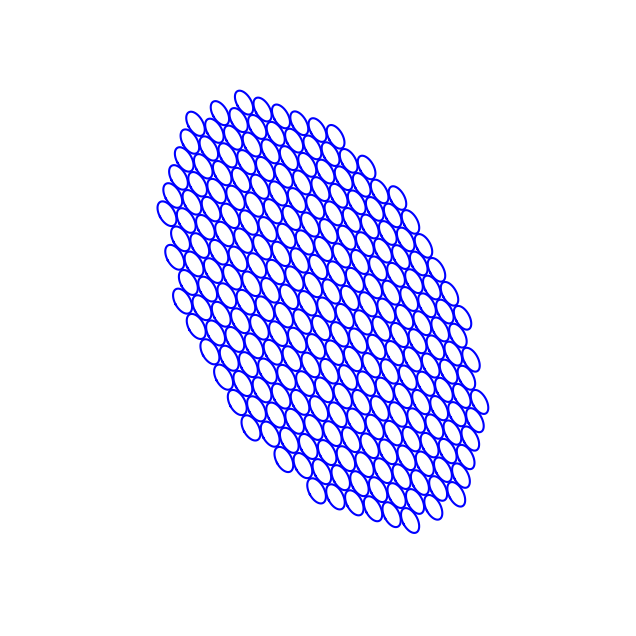

In [392]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the rotation matrices
def rotation_matrix(axis, theta):
    """
    Return the rotation matrix associated with counterclockwise rotation about
    the given axis by theta radians.
    """
    axis = np.asarray(axis)
    axis = axis / np.sqrt(np.dot(axis, axis))
    a = np.cos(theta / 2.0)
    b, c, d = -axis * np.sin(theta / 2.0)
    return np.array([[a * a + b * b - c * c - d * d, 2 * (b * c - a * d), 2 * (b * d + a * c)],
                     [2 * (b * c + a * d), a * a + c * c - b * b - d * d, 2 * (c * d - a * b)],
                     [2 * (b * d - a * c), 2 * (c * d + a * b), a * a + d * d - b * b - c * c]])

pos_top_3d = np.zeros((pmt_pos_top.shape[0],3))
pos_top_3d[:,:2]  = pmt_pos_top[:,-2:]

def rotation_matrix_45_xyz():
    theta = np.radians(45)  # 45 degrees in radians

    # Rotation around X-axis
    R_x = np.array([
        [1, 0, 0],
        [0, np.cos(theta), -np.sin(theta)],
        [0, np.sin(theta), np.cos(theta)]
    ])

    # Rotation around Y-axis
    R_y = np.array([
        [np.cos(theta), 0, np.sin(theta)],
        [0, 1, 0],
        [-np.sin(theta), 0, np.cos(theta)]
    ])

    # Rotation around Z-axis
    R_z = np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta), np.cos(theta), 0],
        [0, 0, 1]
    ])

    # Composite rotation matrix
    R = R_z @ R_y @ R_x
    return R


# Rotation parameters
rotation_axis = [1, 0, 0]  # Rotate around the x-axis
theta = np.radians(25)     # Rotate by 45 degrees

# Create a 3D plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect([1, 1, 1])
ax.axis('off')

# Define rotation matrix
rot_mat = rotation_matrix(rotation_axis, theta)
# Rotate each PMT center position and align circles accordingly
for center in pos_top_3d:
    # Rotate the center position of each PMT
    rotated_center = np.dot(rot_mat, center)
    
    # Define a local circle in the xy-plane relative to the origin
    u = np.linspace(0, 2 * np.pi, 100)
    circle_x = pmt_radius * np.cos(u)
    circle_y = pmt_radius * np.sin(u)
    circle_z = np.zeros_like(u)
    
    # Stack the coordinates into a (3, N) array
    circle_points = np.array([circle_x, circle_y, circle_z])
    
    # Rotate the entire circle orientation
    rotated_circle_points = np.dot(rot_mat, circle_points) + rotated_center[:, np.newaxis]
    
    # Plot the rotated circle
    ax.plot(rotated_circle_points[0], rotated_circle_points[1], rotated_circle_points[2], color="b")

# Set the viewing angle
ax.view_init(elev=30, azim=45)

# Axis labels
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

plt.show()

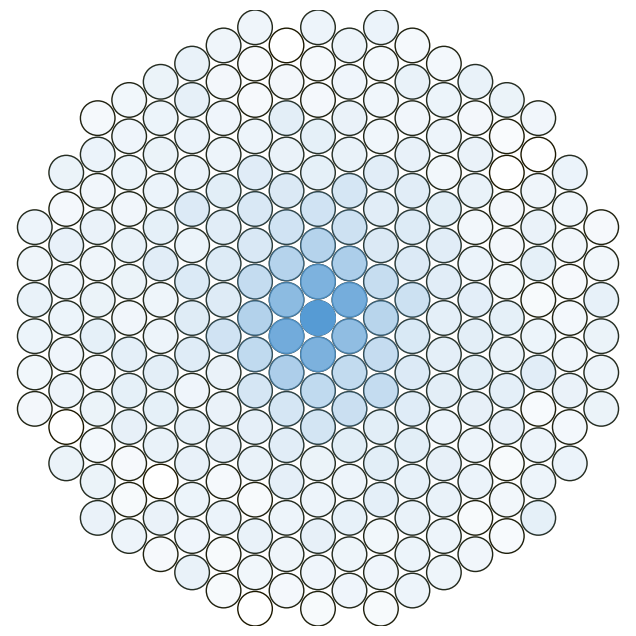

In [57]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
from PIL import Image
from io import BytesIO
import cairosvg

pmt_response = [0.0, 1.0803768634796143, 7.42648983001709, 1.2544403076171875, 5.312455177307129, 7.034584999084473, 1.0358505249023438, 1.7967162132263184, 2.854196548461914, 1.035354733467102, 3.6247198581695557, 6.662735462188721, 0.981148898601532, 6.311551570892334, 6.357546806335449, 0.9932717680931091, 3.9094741344451904, 3.9013452529907227, 4.222618103027344, 7.493537902832031, 5.83620548248291, 5.714659690856934, 0.0, 1.184149980545044, 2.0996413230895996, 0.0, 2.3655269145965576, 5.326144695281982, 3.9013452529907227, 4.405358791351318, 9.28544807434082, 4.670495510101318, 1.0790804624557495, 1.6792607307434082, 7.988492965698242, 7.424880027770996, 9.308629035949707, 6.365268707275391, 5.181459426879883, 2.8032267093658447, 4.301552772521973, 5.535678863525391, 2.792193651199341, 8.66368293762207, 5.100231647491455, 10.989471435546875, 7.127130508422852, 9.134203910827637, 9.677468299865723, 10.188011169433594, 10.456669807434082, 3.6404941082000732, 3.733035087585449, 5.664371490478516, 3.2336418628692627, 5.176874160766602, 7.594132423400879, 11.151387214660645, 5.316926956176758, 6.4144368171691895, 14.570107460021973, 11.069215774536133, 7.02190637588501, 3.8788363933563232, 12.535675048828125, 11.657503128051758, 10.187309265136719, 5.428920269012451, 7.863329887390137, 0.8636967539787292, 1.1022446155548096, 7.272640228271484, 8.883163452148438, 13.448349952697754, 13.450518608093262, 31.021812438964844, 27.313785552978516, 28.398019790649414, 7.048048973083496, 15.676871299743652, 4.698489665985107, 3.1098828315734863, 6.373288631439209, 4.935744762420654, 4.1524977684021, 10.39582633972168, 2.622762680053711, 5.784938812255859, 9.229816436767578, 12.926667213439941, 12.931034088134766, 45.07463836669922, 62.40534591674805, 108.40250396728516, 63.471229553222656, 35.10563278198242, 16.07367706298828, 4.285674095153809, 6.400232315063477, 3.952610969543457, 8.141109466552734, 5.007113456726074, 5.260828971862793, 1.0565719604492188, 4.84071159362793, 6.088891983032227, 15.449941635131836, 55.04717254638672, 58.39194679260254, 275.9014892578125, 322.9217834472656, 92.34843444824219, 17.016572952270508, 20.300125122070312, 14.07785701751709, 7.281420707702637, 6.901451110839844, 1.8758368492126465, 5.786687850952148, 5.050327777862549, 8.453526496887207, 9.229816436767578, 12.796928405761719, 19.516216278076172, 54.37854766845703, 199.21421813964844, 462.6129150390625, 211.83070373535156, 55.58478927612305, 18.42226791381836, 5.426490783691406, 10.461016654968262, 3.0015454292297363, 3.2678258419036865, 6.564826011657715, 2.001716375350952, 0.8227092623710632, 11.42871379852295, 13.42199420928955, 11.362678527832031, 22.063783645629883, 81.42842864990234, 308.2110900878906, 274.1324462890625, 87.79774475097656, 23.501548767089844, 13.759041786193848, 19.597740173339844, 6.163315773010254, 5.758825302124023, 5.931087493896484, 6.400631427764893, 6.930155277252197, 13.654289245605469, 7.2456278800964355, 12.469768524169922, 11.362678527832031, 41.14649963378906, 51.49971008300781, 110.13811492919922, 87.79774475097656, 35.1583251953125, 22.940532684326172, 13.163568496704102, 6.163315773010254, 6.430704116821289, 3.882513999938965, 1.488446831703186, 4.936579704284668, 3.4342379570007324, 5.429265022277832, 10.372787475585938, 12.118318557739258, 14.333401679992676, 19.424705505371094, 20.875226974487305, 40.39887237548828, 35.1583251953125, 20.966339111328125, 14.876331329345703, 4.819838047027588, 6.075902938842773, 5.711845397949219, 2.9711742401123047, 6.467406749725342, 2.053300142288208, 0.9879146814346313, 2.715531349182129, 5.819361209869385, 13.58858871459961, 18.210466384887695, 14.310131072998047, 28.4609432220459, 10.067359924316406, 7.016353130340576, 5.19261360168457, 3.9116697311401367, 9.513864517211914, 6.203516006469727, 8.746170997619629, 1.2272156476974487, 10.37583065032959, 2.294036626815796, 2.5611250400543213, 13.016648292541504, 13.743061065673828, 14.004807472229004, 7.757935523986816, 10.44599723815918, 12.565338134765625, 1.144788384437561, 2.187088966369629, 7.4259538650512695, 2.6826930046081543, 3.1279304027557373, 6.658023357391357, 2.213589668273926, 7.704853534698486, 2.4381492137908936, 8.206632614135742, 3.4677419662475586, 6.659291744232178, 1.830460786819458, 2.3139259815216064, 1.2125922441482544, 3.9475674629211426, 1.273260474205017, 3.340214729309082, 4.104540824890137, 0.0, 6.693620204925537, 4.698575019836426, 3.014408588409424, 3.450620174407959, 3.7799417972564697, 1.589361310005188, 0.0, 3.9578099250793457, 6.164095878601074, 0.0, 0.478873074054718, 2.1854658126831055, 5.550734043121338, 7.5930938720703125, 2.1050262451171875, 5.0479888916015625, 5.30972957611084, 3.156589984893799, 6.268820762634277, 7.435042381286621, 2.0299623012542725, 1.480957269668579, 5.978161811828613]
pmt_response = np.array(pmt_response)

# Calculate scaling factors for the square plot
max_x = np.max(np.abs(pmt_pos_top[:, -2])) + pmt_radius
max_y = np.max(np.abs(pmt_pos_top[:, -1])) + pmt_radius
max_limit = 1. * max(max_x, max_y)  # Extend symmetrically by 1.2 factor

# Create the figure and axis
fig = plt.figure(figsize=(8, 8), facecolor='white')  # Square plot
ax = fig.add_subplot(111)
ax.axis('off')  # Turn off axes

# Set symmetric limits for the square plot
ax.set_xlim(-max_limit, max_limit)
ax.set_ylim(-max_limit, max_limit)
ax.set_aspect('equal')  # Ensure aspect ratio is 1:1

# Add PMT circles
for pos in pmt_pos_top:
    circle = plt.Circle((pos[-2], pos[-1]), pmt_radius, color='#1c1800', fill=False)
    ax.add_artist(circle)


# Scale the PMT response to be a bit bigger
distance = np.linalg.norm(pmt_pos_top[:, -2:].astype('float'),axis=-1)
distance /= distance.max()
#distance = np.sqrt(distance)
pmt_response /= pmt_response.max()
pmt_response = np.sqrt(pmt_response) #/ distance
#pmt_response /= pmt_response.max()
#pmt_response[np.isnan(pmt_response)] = 0
for i in range(len(pmt_pos_top)):
    circle = plt.Circle((pmt_pos_top[i][-2], pmt_pos_top[i][-1]), pmt_radius, alpha = pmt_response[i],  color='#569bd4', fill=True)
    ax.add_artist(circle)
#Xenon logo colors - used average of those for response 
#4068b2
#6dcff6
# Save the plot as an EPS file
plt.savefig('/Code/misc/tpc_stylized_response.pdf', format='pdf', bbox_inches='tight', transparent=True)

plt.show()

In [68]:
def get_filtered(path):
    with h5py.File(path, 'r') as f:
        patterns = f['patterns'][:]
        ei = f['event_info'][:]
        # run_ids = f["run_ids"][:]
        print("Total Livetime {}s".format(f.attrs["Livetime_tot_s"]))
        print("Total Datapoints pre filter {}".format(f.attrs["OriginalSize"]))
        print("Total Datapoints post filter {}".format(f.attrs["CurrentSize"]))
    assert len(patterns) == len(ei)
    return patterns, ei


filtered_path = '/Code/processed_data/SrCut_z20_0000.hdf5'

patterns, ei = get_filtered(filtered_path)
positions = np.stack([ei['s2_x'], ei['s2_y']],axis = -1)

Total Livetime 235843.858s
Total Datapoints pre filter 1314844
Total Datapoints post filter 184657


(array([[ 0.6912582,  0.       ,  1.0542113, ...,  8.030086 ,  2.7134285,
          0.9958444],
        [16.33402  ,  8.690921 ,  1.8328996, ...,  6.129741 ,  6.58412  ,
          5.280937 ],
        [64.58376  , 69.39062  , 30.943903 , ...,  6.9844303,  0.       ,
          5.0841613],
        ...,
        [ 5.044017 ,  5.6936827,  7.1222153, ...,  2.1571076,  8.988774 ,
          0.       ],
        [ 1.1204547,  6.3155217,  9.771179 , ...,  7.8478336,  3.0300105,
          3.5161266],
        [ 4.586507 ,  7.4743867,  6.2739496, ...,  8.425395 ,  5.5916014,
          7.7757587]], dtype=float32),)

In [290]:
np.argmax(patterns['s2_area_per_channel'][:,198])

149248

<Axes: xlabel='X position (cm)', ylabel='Y position (cm)'>

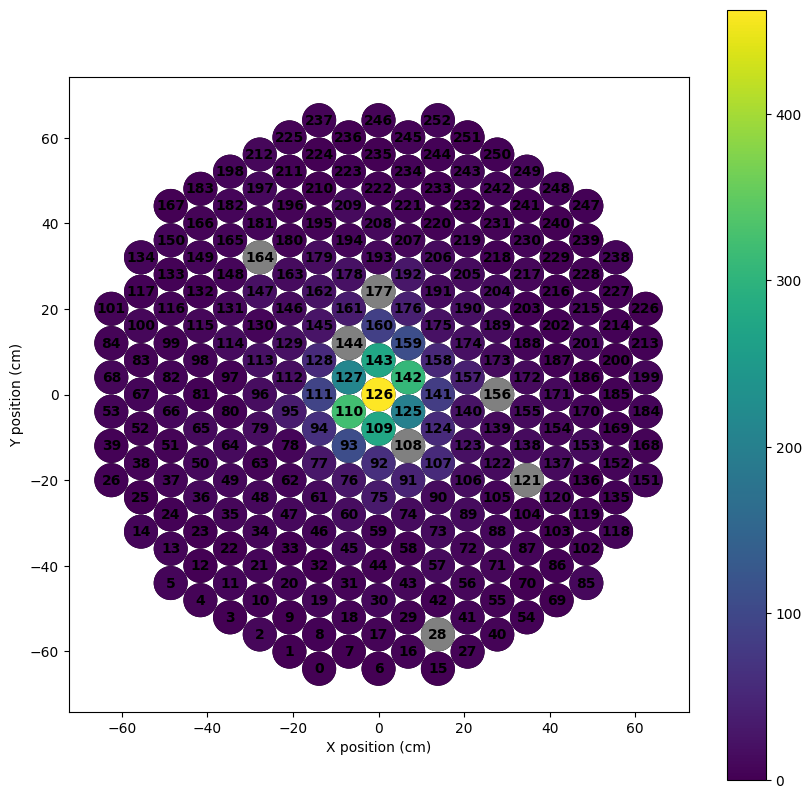

In [38]:
#bmap = (positions ** 2).sum(axis=-1)**(1/2)  < 1
#chosen_response = patterns['s2_area_per_channel'][149248]#[np.random.randint(len(positions))]
ax = plot_pmt_indeces(pmt_pos_top)
plot_pmt_response(pmt_pos_top, pmt_response[:n_pmts], ax = ax, dead_pmts=dead_pmts)


In [46]:
pmt_response[108] = (pmt_response[92] + pmt_response[124])/2

In [48]:
repr(pmt_response[:n_pmts].tolist())

'[0.0, 1.0803768634796143, 7.42648983001709, 1.2544403076171875, 5.312455177307129, 7.034584999084473, 1.0358505249023438, 1.7967162132263184, 2.854196548461914, 1.035354733467102, 3.6247198581695557, 6.662735462188721, 0.981148898601532, 6.311551570892334, 6.357546806335449, 0.9932717680931091, 3.9094741344451904, 3.9013452529907227, 4.222618103027344, 7.493537902832031, 5.83620548248291, 5.714659690856934, 0.0, 1.184149980545044, 2.0996413230895996, 0.0, 2.3655269145965576, 5.326144695281982, 3.9013452529907227, 4.405358791351318, 9.28544807434082, 4.670495510101318, 1.0790804624557495, 1.6792607307434082, 7.988492965698242, 7.424880027770996, 9.308629035949707, 6.365268707275391, 5.181459426879883, 2.8032267093658447, 4.301552772521973, 5.535678863525391, 2.792193651199341, 8.66368293762207, 5.100231647491455, 10.989471435546875, 7.127130508422852, 9.134203910827637, 9.677468299865723, 10.188011169433594, 10.456669807434082, 3.6404941082000732, 3.733035087585449, 5.664371490478516, 